# Creating a metric to grade the statements released by companies

### In this notebook we have created 3 main metrics:-
1. Score per total words in the statements
2. Weighted category score (i.e the number of category words found in a statement and their weights)
3. Phrase score, where we consider two nearby words with a distance of 5 units between them

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
category_weights = {'Responsibilities': 0.3, 'Actions': 0.25, 'Regulations': 0.2, 'Org. Info.': 0.1, 'Values': 0.1, 'Definitions': 0.05}
category_words = {'Responsibilities': ["knowingly", "adequate", "involved", "policy procedure", "potentially", "continually", "support deal", "import", "supplier good", "within organization", "knowingly involved", "wholly", "senior management", "iso", "review annually", "approval process", "ensure transparency", "etc", "44286", "potential risk place within", "eligibility", "continue take", "traffic take", "commit act", "2015 set", "within business", "integrity transparency", "reprisal", "take continue", "approach form", "fear reprisal", "transparent manner", "conduct ethical", "pursuant 54", "explain", "enforcement", "indicate", "transparency dealing", "form commit accordance section", "occur within", "within business", "make accordance", "commence", "exposure", "educate", "traffic occur", "extent", "within supply", "part commitment", "reduce risk", "take step", "failure", "commitment combat", "excess", "adequate", "act human", "make sure", "risk occur executive officer", "vet", "constitute", "intranet", "make behalf", "confidence", "minimize", "2015 act", "identity", "wrongdoing", "comply law", "renew", "confidentially", "assist", "organization supply", "whistleblowing policy", "effectively", "minimize risk", "analysis", "measure effectiveness", "victim", "adult", "tender", "vulnerable", "statutory", "equality", "mandatory", "arrangement", "incident", "housing", "offense", "44286", "police", "domestic", "council", "referral", "helpline", "wide range", "commission", "duty prevent human", "accordance 2015", "publish accordance", "statement publish", "remedial", "traffic business", "wrongdoing", "2015 set", "remedial action", "labor human", "grow", "channel", "ahead", "kind action take", "actively", "group company", "responsibly", "corporate social", "44377"],
                  'Actions': ['hire', 'candidate', 'recruit', 'attention', 'blow', 'problem', 'whistle blow', 'bring', 'policy process', 'airline', 'possibility', 'accordance section', 'documentation', 'alert', 'annual basis', 'second', 'body', 'might', 'spot', 'amount', 'stand', 'alert', 'long stand', 'suitable', 'encourage report', 'alert risk', 'make clear', 'brief', 'payroll', 'build long', 'risk however', 'act upon', 'however small', 'expect report', 'clear expectation', 'whistle blower', 'point', 'protection whistle', 'respective', 'concern management', 'sedex', 'farm', 'retailer', 'eti', 'ingredient', 'membership', 'smeta', 'raw material', 'factory', 'attend', 'data exchange', 'license', 'farmer', 'interview', 'pack', 'strong together', 'manufacturing', 'month', 'packaging', 'eti base', 'potential risk', 'put place', 'understand potential', 'easy', 'aim ensure', 'commit prevent', 'fear retaliation', 'reputable', 'circumstance', 'retaliation', 'rise', 'recognize responsibility', 'maintain high', 'set action', 'responsibility take', 'take robust', 'robust approach', 'statement set', 'give rise', 'behavior expect', 'understand risk', 'level understand', 'high level', 'whistle blower', 'initiative identify', 'organization structure', 'potential area', 'assess potential', 'policy reflect', 'protect whistle', 'anti policy', 'combat human', 'practice combat', 'control ensure', 'parent company', 'adherence value', 'occur monitor', 'supplier adherence', 'ensure part', 'ultimate', 'map', 'strengthen', 'launch', 'expert', 'collaboration', 'bring', 'factory', 'priority', 'collaborate', 'target', 'grievance', 'begin', 'migrant', 'embed', 'beyond', 'expand', 'goal', 'align', 'positive', 'roll', 'hotline', 'language', 'conflict', 'president', 'mineral', 'component', 'prohibition', 'corrective', 'involuntary', 'fiscal', 'corporation', 'collectively', 'retaliation', 'anonymous', 'around world', 'bond', 'among', 'anonymously', 'citizenship', 'conflict mineral', 'spend', 'embed', 'screen', 'index', 'speak', 'broad', 'roll', 'mandatory', 'module', 'plc', 'hotline', 'venture', 'procure', 'initial', 'likely', 'size', 'joint', 'functional', 'deem', 'joint venture'],
                  'Regulations': ["compact", "universal", "united nation", "convention", "universal declaration", "ilo", "internationally", "global compact", "ten", "elimination", "signatory", "topic", "csr", "goal", "evaluation", "anti corruption", "among", "continuous", "integrate", "contribute", "chain act", "transparency supply", "california transparency", "disclose", "act 2010", "unannounced", "internal accountability", "retailer", "comply applicable", "address risk", "657", "2012", "inc", "comply law", "announce", "corrective", "employee contractor", "slave", "reserve right", "sb 657"],
                  'Org. Info.': ["vehicle", "car", "motor", "repair", "dealer", "automotive", "insurance", "van", "credit", "save", "lease", "broker", "commodity", "dealership", "arrange", "forced", "physical", "encompass", "movement", "fleet send", "collect", "interest", "payment", "notice", "user", "transfer", "otherwise", "post", "charge", "reason", "submit", "claim", "guarantee", "damage", "license", "consent", "return", "can", "express shop", "store", "accessory", "gift", "collection", "return", "item", "card", "bag", "light", "turn", "book", "style", "special", "size", "price", "ship", "sport", "holiday box", "charity", "school", "tender", "student", "university", "award", "equality", "july", "volunteer", "research", "body", "fund", "govern", "clean", "procure", "college", "trustee", "august", "raise awareness", "cater", "history", "investor", "covid", "contact us", "skip", "covid 19", "blog", "award", "privacy", "press", "right reserve", "navigation", "twitter", "story", "release", "insight", "copyright", "study", "overview", "login", "energy", "industrial", "power", "application", "engineering", "gas", "chemical", "oil", "plant", "innovative", "innovation", "infrastructure", "transport", "water", "leader", "metal", "component", "fuel", "cost", "recycle", "road", "park", "wale", "registered", "west", "tel", "scotland", "england wale", "31st", "fax", "street", "vat", "1st", "registration", "manchester", "info", "end 31st", "residential", "handbook", "privately", "france", "germany", "australia", "canada", "spain", "india", "africa", "netherlands", "italy", "singapore", "ireland", "hong kong", "republic", "hong kong", "japan", "poland", "switzerland", "usa", "belgium", "asset", "regulate", "outsource", "bank", "fund", "authorize", "money", "insurance", "investor", "real", "2015 act", "jurisdiction", "capital", "invest", "advisory", "estate", "llp", "relatively", "real estate", "equity"],
                  'Values': ["honesty", "uphold", "transparency statement", "wherever", "ethical standard", "high ethical", "amongst", "honest", "child labor", "core value", "43435", "fairly", "success", "holding", "continue review", "honesty integrity", "unethical", "conducting", "make behalf", "assist freely", "appropriately", "inhumane", "freely choose", "harsh", "inhumane treatment", "living wage", "suspicion", "excessive", "hygienic", "harsh inhumane", "collective", "tailor", "raise awareness", "non compliance", "remedial", "proactive", "freedom association", "practical", "ethical trading"],
                  'Definitions': ["exploit", "liberty", "violation", "fundamental", "forced", "common", "various form", "commercial gain", "dealing relationship", "personal commercial", "forced compulsory", "deprivation", "crime violation", "person liberty", "exploit personal", "form servitude", "liberty another", "take various", "deprivation person", "order exploit", "suspicion","word", "microsoft", "microsoft word", "traffic take", "36 million", "everyone", "docx", "place supply", "exceed", "2015 act", "forward", "october", "commercial organization", "part business", "2015 require", "supply good", "prepare", "year ensure", "review annually", "fairly","physical", "sexual", "gender", "race", "threat", "leave", "disability", "coercion", "bond", "status", "union", "permit", "orientation", "overtime", "religion", "exceed", "identity", "voluntary", "notice", "origin"]}

def calculate_score(statement):
    word_counts = {category: 0 for category in category_weights.keys()}
    for word in statement.split():
        for category, words in category_words.items():
            if word in words:
                word_counts[category] += 1
    weighted_counts = {category: count * category_weights[category] for category, count in word_counts.items()}
    total_score = sum(weighted_counts.values())
    max_possible_score = sum([len(words) * weight for words, weight in zip(category_words.values(), category_weights.values())])
    scaled_score = (total_score / max_possible_score) * 100
    return round(scaled_score, 1)


#### Sample statement for testing the function

In [14]:
statement = 'assessment 01 11 18 13 14 15 content obligation act information business supply chain relevant contact group structure organization policy procedures governance responsibility principles performance report due diligence process assess managing risk key indicator train provision improvement 16 26th march 2015 uk receive royal assent require business publish set step take ensure human traffic take place part chain create use supplier registration service framework find online follow link address provide activity undertaken tackle may use support production annual set contain within submit user user act behalf represent warrant provide declaration accurate complete possible shall accurately represent capability patricia mcenroe development manager 01375 366 700 fhunt co 1970 commercial organization carry turnover 36m require disclose accord state 61644119 00 gbp operate corporate family produce indicated complete guidance associate best practice see defines amount derived good service fall ordinary activity include subsidiary undertaking operate wholly outside section basic operation help provide context executive board member partner name paul bland currently hold position ceo present conduct estimated staff headcount 100 base country highlight particular violation international trade union confederation examines frameworks effort specific relate summarize hunt zero tolerance approach commit implement enforce effective system control anywhere policy applies person work us capacity employee level director officer agency worker second agent contractor supplier people body company ethical trading set practice meet standard responsible procurement line continue strategy detail equality diversity compliance procure equipment tool material diverse range local ethnic minority appendix develop formal process include access remedy compensation justice victim freedom terminate employment movement prohibits threat violence harassment intimidation debt bondage bond labor disciplinary measure obligation work compulsory overtime include use worker pay recruitment fee endorse senior management publicly available annually update statement take prevent deadline produce yet reach mechanism stakeholder report concern suspect incidence 10 extend operate strict approve vendor procedure member demonstrate individual competence audit yearly continual jfh contract complete project review incorporate score matrix feedback positive negative review action plan put event upon request sub past 12 month report relation internally level function resource last fin convict act misconduct employ 80 directly agency provider employ indirect method temporary permanent seasonal low skilled unskilled hazardous condition detail core demolition work carry densely populated area utmost consideration surround environment oversight conduct union ngos create via implementation copy limit ultimately behave manner consistent value respect colleague client encourage increase knowledge custom official source london website aim source develop site manager ensuring manage sit purpose aim proactively behavior amongst team subcontractor inconsistent breach register consider stage need identification requirement definition tender evaluation contract award submit audit location action 50 tier one measure mitigate investigates way audit tier relate investigative wage hour association child harsh inhumane treatment interval every house audit certify third party result identifies regard significant factor cause occur rely migrant recruit broker multiple immediate control great seek identify instance none identify communication basis reflect reinforce priority possess independent accreditation certification report record standard response time commitment content scope delivery 60 mandatory receive induction toolbox talk meeting briefing poster deliver group personnel response analyze improvement recommend acknowledge finish acknowledge improve questionnaire recommendation select get start menu dashboard consider agreement sla follow incident encounter subject nqc ltd term accepted accordance enter supply current true accepts accuracy completeness reserve right verify onto register england wale number 04854362 george leigh street manchester m4 5dl 2017 jan 2018 anti crime gross violation fundamental right various form servitude forced common deprivation person liberty another order exploit personal gain overall complies legal comply comprise director health safety together maintain across operational evolve regulatory requirement breach address primary day monitoring effectiveness deal query internal counter employ must read understand prevention detection avoid might lead suggest raise issue suspicion part early stage awareness communicate communicate partner outset relationship appropriate thereafter give effect implement keep generally treat result instant dismissal without notice individual sign chief officer'

In [6]:
calculate_score(statement)

7.5

#### Checking how many words from category occured in the statement

In [7]:
statement = 'aberdeen airport park flight skyscanner priority security lounge car hire taxi abz menu service alert flight info shop dine booking help covid19 login loganair summer 2021 sale use promo code summer10 get 10 book monday show alert a92 haudagain roundabout traffic restriction click information dollar south african rand uae dirham australian canadian swiss franc euro british pound new zealand turkish lira mexican peso amount please fill valid currency field buy gbp 1065 00 eur pick location alicante amsterdam intl belfast city bergen birmingham bourgas bristol cardiff copenhagen corfu dalaman dublin durham teesside enontekio esbjerg faro gdansk geneva haugesund humberside ibiza jersey kirkwall london heathrow luton malaga manchester newcastle newquay norwich oslo palma de mallorca paris cdg reus rhodes riga shetland sumburgh stavanger tenerife wick john groat date time 01 02 03 04 05 06 07 08 09 11 12 13 14 15 16 17 18 19 20 21 22 23 25 30 35 40 45 50 55 drop travel return depart number traveler search return single arrive outbound adult child infant majorca southampton check entry passenger lounge type cover require trip annual worldwide inc usa canada caribbean exc europe excl spain cyprus malta turkey greece incl would like start quote cash prepaid card choose bulgarian lev brazilian real hong kong hungarian forint indonesian rupiah israeli sheqel japanese yen mauritian rupee malaysian ringgit norwegian krone philippine qatari riyal russian ruble saudi swedish krona taiwan group 2015 statement holding limit include airport international glasgow subsidiary investment pension trustee baa lynton ndh1 herein refer publishing compliance section 54 approve board director behalf contain within correct publish detail step take order comply provision aid prevention human traffic financial year end 31 march 2019 business consortium ferrovial macquarie infrastructure asset mira own long establish successful relationship work together across project partnerships supply chain cover large good many industry sector group follow category capital operational professional telecoms commercial include airline ground handler retailer department great less extent depend interdependency various department well commonality require result supplier deal one 2018 procurement continually review act result reduce remove satisfy requirement supplier cleanse region 932 turnover trigger produce governance monitor team monitor basis commencement source process demonstrate obligation prior tender send pre qualification questionnaire pqq may progress stage highlight risk otherwise engage issue respect review response questionnaires determine whether risk associate ass suitability manage base provide provide insufficient high manufacture company uniform provider carry investigation either carry desk top audit telephone visit premise full company document delve deep ethical behavior duty care employee policy place satisfactorily manage also provide feedback action mitigate potential site deem non compliant remove alternative source sustainable policy reflect commitment act ethically integrity relationship implement enforce effective system control ensure take anywhere training understanding undertaken appropriate area commit persistently tackle focus continuous improvement delivery strategy meet reserve space today right withdraw consent privacy notice explains us reason right data protection legislation share analytics partner'
word_counts = {category: 0 for category in category_weights.keys()}
for word in statement.split():
    for category, words in category_words.items():
        if word in words:
            word_counts[category] += 1

In [8]:
word_counts

{'Responsibilities': 4,
 'Actions': 8,
 'Regulations': 3,
 'Org. Info.': 23,
 'Values': 1,
 'Definitions': 1}

# Trying with other way

The below function returns two values, score per total number of words and the normal weighted category words!

In [34]:
# define the categories and their corresponding weights
def grade_statement(statement):
    
    category_weights = {'Responsibilities': 1.3, 'Actions': 1.25, 'Regulations': 1.2, 'Org. Info.': 1.1, 'Values': 1.1, 'Definitions': 1.05}
    category_words = {'Responsibilities': ["knowingly", "adequate", "involved", "policy procedure", "potentially", "continually", "support deal", "import", "supplier good", "within organization", "knowingly involved", "wholly", "senior management", "iso", "review annually", "approval process", "ensure transparency", "etc", "44286", "potential risk place within", "eligibility", "continue take", "traffic take", "commit act", "2015 set", "within business", "integrity transparency", "reprisal", "take continue", "approach form", "fear reprisal", "transparent manner", "conduct ethical", "pursuant 54", "explain", "enforcement", "indicate", "transparency dealing", "form commit accordance section", "occur within", "within business", "make accordance", "commence", "exposure", "educate", "traffic occur", "extent", "within supply", "part commitment", "reduce risk", "take step", "failure", "commitment combat", "excess", "adequate", "act human", "make sure", "risk occur executive officer", "vet", "constitute", "intranet", "make behalf", "confidence", "minimize", "2015 act", "identity", "wrongdoing", "comply law", "renew", "confidentially", "assist", "organization supply", "whistleblowing policy", "effectively", "minimize risk", "analysis", "measure effectiveness", "victim", "adult", "tender", "vulnerable", "statutory", "equality", "mandatory", "arrangement", "incident", "housing", "offense", "44286", "police", "domestic", "council", "referral", "helpline", "wide range", "commission", "duty prevent human", "accordance 2015", "publish accordance", "statement publish", "remedial", "traffic business", "wrongdoing", "2015 set", "remedial action", "labor human", "grow", "channel", "ahead", "kind action take", "actively", "group company", "responsibly", "corporate social", "44377"],
                      'Actions': ['hire', 'candidate', 'recruit', 'attention', 'blow', 'problem', 'whistle blow', 'bring', 'policy process', 'airline', 'possibility', 'accordance section', 'documentation', 'alert', 'annual basis', 'second', 'body', 'might', 'spot', 'amount', 'stand', 'alert', 'long stand', 'suitable', 'encourage report', 'alert risk', 'make clear', 'brief', 'payroll', 'build long', 'risk however', 'act upon', 'however small', 'expect report', 'clear expectation', 'whistle blower', 'point', 'protection whistle', 'respective', 'concern management', 'sedex', 'farm', 'retailer', 'eti', 'ingredient', 'membership', 'smeta', 'raw material', 'factory', 'attend', 'data exchange', 'license', 'farmer', 'interview', 'pack', 'strong together', 'manufacturing', 'month', 'packaging', 'eti base', 'potential risk', 'put place', 'understand potential', 'easy', 'aim ensure', 'commit prevent', 'fear retaliation', 'reputable', 'circumstance', 'retaliation', 'rise', 'recognize responsibility', 'maintain high', 'set action', 'responsibility take', 'take robust', 'robust approach', 'statement set', 'give rise', 'behavior expect', 'understand risk', 'level understand', 'high level', 'whistle blower', 'initiative identify', 'organization structure', 'potential area', 'assess potential', 'policy reflect', 'protect whistle', 'anti policy', 'combat human', 'practice combat', 'control ensure', 'parent company', 'adherence value', 'occur monitor', 'supplier adherence', 'ensure part', 'ultimate', 'map', 'strengthen', 'launch', 'expert', 'collaboration', 'bring', 'factory', 'priority', 'collaborate', 'target', 'grievance', 'begin', 'migrant', 'embed', 'beyond', 'expand', 'goal', 'align', 'positive', 'roll', 'hotline', 'language', 'conflict', 'president', 'mineral', 'component', 'prohibition', 'corrective', 'involuntary', 'fiscal', 'corporation', 'collectively', 'retaliation', 'anonymous', 'around world', 'bond', 'among', 'anonymously', 'citizenship', 'conflict mineral', 'spend', 'embed', 'screen', 'index', 'speak', 'broad', 'roll', 'mandatory', 'module', 'plc', 'hotline', 'venture', 'procure', 'initial', 'likely', 'size', 'joint', 'functional', 'deem', 'joint venture'],
                      'Regulations': ["compact", "universal", "united nation", "convention", "universal declaration", "ilo", "internationally", "global compact", "ten", "elimination", "signatory", "topic", "csr", "goal", "evaluation", "anti corruption", "among", "continuous", "integrate", "contribute", "chain act", "transparency supply", "california transparency", "disclose", "act 2010", "unannounced", "internal accountability", "retailer", "comply applicable", "address risk", "657", "2012", "inc", "comply law", "announce", "corrective", "employee contractor", "slave", "reserve right", "sb 657"],
                      'Org. Info.': ["vehicle", "car", "motor", "repair", "dealer", "automotive", "insurance", "van", "credit", "save", "lease", "broker", "commodity", "dealership", "arrange", "forced", "physical", "encompass", "movement", "fleet send", "collect", "interest", "payment", "notice", "user", "transfer", "otherwise", "post", "charge", "reason", "submit", "claim", "guarantee", "damage", "license", "consent", "return", "can", "express shop", "store", "accessory", "gift", "collection", "return", "item", "card", "bag", "light", "turn", "book", "style", "special", "size", "price", "ship", "sport", "holiday box", "charity", "school", "tender", "student", "university", "award", "equality", "july", "volunteer", "research", "body", "fund", "govern", "clean", "procure", "college", "trustee", "august", "raise awareness", "cater", "history", "investor", "covid", "contact us", "skip", "covid 19", "blog", "award", "privacy", "press", "right reserve", "navigation", "twitter", "story", "release", "insight", "copyright", "study", "overview", "login", "energy", "industrial", "power", "application", "engineering", "gas", "chemical", "oil", "plant", "innovative", "innovation", "infrastructure", "transport", "water", "leader", "metal", "component", "fuel", "cost", "recycle", "road", "park", "wale", "registered", "west", "tel", "scotland", "england wale", "31st", "fax", "street", "vat", "1st", "registration", "manchester", "info", "end 31st", "residential", "handbook", "privately", "france", "germany", "australia", "canada", "spain", "india", "africa", "netherlands", "italy", "singapore", "ireland", "hong kong", "republic", "hong kong", "japan", "poland", "switzerland", "usa", "belgium", "asset", "regulate", "outsource", "bank", "fund", "authorize", "money", "insurance", "investor", "real", "2015 act", "jurisdiction", "capital", "invest", "advisory", "estate", "llp", "relatively", "real estate", "equity"],
                      'Values': ["honesty", "uphold", "transparency statement", "wherever", "ethical standard", "high ethical", "amongst", "honest", "child labor", "core value", "43435", "fairly", "success", "holding", "continue review", "honesty integrity", "unethical", "conducting", "make behalf", "assist freely", "appropriately", "inhumane", "freely choose", "harsh", "inhumane treatment", "living wage", "suspicion", "excessive", "hygienic", "harsh inhumane", "collective", "tailor", "raise awareness", "non compliance", "remedial", "proactive", "freedom association", "practical", "ethical trading"],
                      'Definitions': ["exploit", "liberty", "violation", "fundamental", "forced", "common", "various form", "commercial gain", "dealing relationship", "personal commercial", "forced compulsory", "deprivation", "crime violation", "person liberty", "exploit personal", "form servitude", "liberty another", "take various", "deprivation person", "order exploit", "suspicion","word", "microsoft", "microsoft word", "traffic take", "36 million", "everyone", "docx", "place supply", "exceed", "2015 act", "forward", "october", "commercial organization", "part business", "2015 require", "supply good", "prepare", "year ensure", "review annually", "fairly","physical", "sexual", "gender", "race", "threat", "leave", "disability", "coercion", "bond", "status", "union", "permit", "orientation", "overtime", "religion", "exceed", "identity", "voluntary", "notice", "origin"]}# define the text sentence to be scored
    word_counts = {category: 0 for category in category_weights.keys()}
    
    for word in statement.split():
        for cat_word in category_words.keys():
            if word in category_words[cat_word]:
                word_counts[cat_word] = word_counts.get(cat_word,0)+1
    
    weighted_counts = {category: count * category_weights[category] for category, count in word_counts.items()}
    print(weighted_counts)
    total_score = sum(weighted_counts.values())
    statement_score = (total_score / len(statement.split())) * 100
#     print(word_counts)
#     print(total_score)
#     print(len(statement.split()))
    return statement_score, total_score

In [13]:
grade_statement(statement)

(9.655532359081418, 46.24999999999999)

#### The Subset data v10 was created and saved in the google drive.

In [7]:
df = pd.read_excel('subset_data_v10.xlsx')
df.head(2)

,Unnamed: 0,statement,Company,FS_industry,FS_hq,statement_cleaned,statement_cleaned_v2,Company_Id,2022 NAICS Sector,2-digit Code,ID,FY 2019,FY 2020,FY 2021,FY 2022,Grade_Score,Category_Score,Normalized_GradeScore,Normalized_CategoryScore
0,0,1Spatial Modern Slavery Act Policy Statement H...,1Spatial Plc,Software,United Kingdom,home solution government boundary law enforcem...,1spatial home solution solution government bou...,71,Information,51.0,IQ52028816,"17,624","23,385","24,600","27,027",11.598513,31.20,0.416357,0.170678
1,1,Slavery and Human Trafficking Statement – Shaz...,1Stop Halal Limited,Food Products,United Kingdom,shazans shazan food continue monitor covid 19 ...,shazans shazan food continue monitor covid19 d...,72,Manufacturing,31.0,IQ301651117,"56,692","67,385",NaN,"67,385",9.074074,22.05,0.325736,0.120624


In [15]:
df['Grade_Score'] = df['statement_cleaned'].apply(lambda x : grade_statement(x)[0])

In [16]:
df['Category_Score'] = df['statement_cleaned'].apply(lambda x: grade_statement(x)[1])

In [17]:
df.head(2)

,statement,Company,FS_industry,FS_hq,statement_cleaned,statement_cleaned_v2,Company_Id,2022 NAICS Sector,2-digit Code,ID,FY 2019,FY 2020,FY 2021,FY 2022,Grade_Score,Category_Score
0,1Spatial Modern Slavery Act Policy Statement H...,1Spatial Plc,Software,United Kingdom,home solution government boundary law enforcem...,1spatial home solution solution government bou...,71,Information,51.0,IQ52028816,"17,624","23,385","24,600","27,027",11.598513,31.20
1,Slavery and Human Trafficking Statement – Shaz...,1Stop Halal Limited,Food Products,United Kingdom,shazans shazan food continue monitor covid 19 ...,shazans shazan food continue monitor covid19 d...,72,Manufacturing,31.0,IQ301651117,"56,692","67,385",NaN,"67,385",9.074074,22.05


{'bodies': [<matplotlib.collections.PolyCollection at 0x19a7c7627c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19a7c753670>,
 'cmins': <matplotlib.collections.LineCollection at 0x19a7c762eb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x19a7c7162b0>}

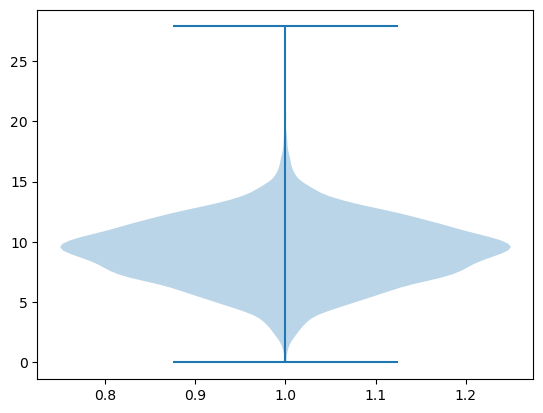

In [18]:
plt.violinplot(df['Grade_Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19a7c6c06a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a7c6c0c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a7c6c03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a7c6e3220>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a7c6e34f0>],
 'means': []}

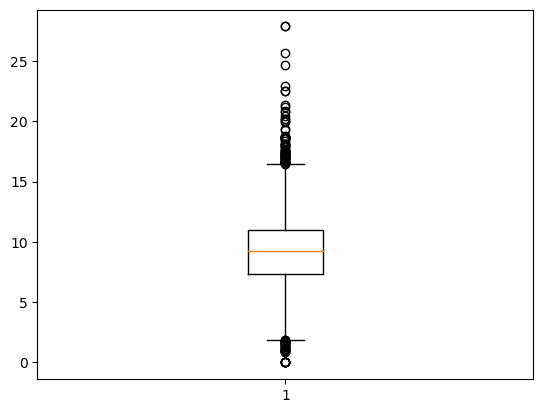

In [19]:
plt.boxplot(df['Grade_Score'])

In [20]:
df['Category_Score'].sort_values(ascending=False)

10159    182.80
10431    165.75
8567     163.00
10810    159.05
10160    158.80
          ...  
5945       0.00
1459       0.00
11105      0.00
716        0.00
715        0.00
Name: Category_Score, Length: 11265, dtype: float64

In [21]:
df['Grade_Score'].max()

27.857142857142858

### Phrase score is created to check the two nearby words which belong to the same category and the synonyms for the words in category has been added in the same dictionary.

In [33]:
from collections import defaultdict
closer_cat_words = defaultdict(list)
def phrase_score(statement,category_words):
    
    category_weights = {'Responsibilities': 1.3, 'Actions': 1.25, 'Regulations': 1.2, 'Org. Info.': 1.1, 'Values': 1.1, 'Definitions': 1.05}
#     category_words = {'Responsibilities': ["knowingly", "adequate", "involved", "policy procedure", "potentially", "continually", "support deal", "import", "supplier good", "within organization", "knowingly involved", "wholly", "senior management", "iso", "review annually", "approval process", "ensure transparency", "etc", "44286", "potential risk place within", "eligibility", "continue take", "traffic take", "commit act", "2015 set", "within business", "integrity transparency", "reprisal", "take continue", "approach form", "fear reprisal", "transparent manner", "conduct ethical", "pursuant 54", "explain", "enforcement", "indicate", "transparency dealing", "form commit accordance section", "occur within", "within business", "make accordance", "commence", "exposure", "educate", "traffic occur", "extent", "within supply", "part commitment", "reduce risk", "take step", "failure", "commitment combat", "excess", "adequate", "act human", "make sure", "risk occur executive officer", "vet", "constitute", "intranet", "make behalf", "confidence", "minimize", "2015 act", "identity", "wrongdoing", "comply law", "renew", "confidentially", "assist", "organization supply", "whistleblowing policy", "effectively", "minimize risk", "analysis", "measure effectiveness", "victim", "adult", "tender", "vulnerable", "statutory", "equality", "mandatory", "arrangement", "incident", "housing", "offense", "44286", "police", "domestic", "council", "referral", "helpline", "wide range", "commission", "duty prevent human", "accordance 2015", "publish accordance", "statement publish", "remedial", "traffic business", "wrongdoing", "2015 set", "remedial action", "labor human", "grow", "channel", "ahead", "kind action take", "actively", "group company", "responsibly", "corporate social", "44377"],
#                       'Actions': ['hire', 'candidate', 'recruit', 'attention', 'blow', 'problem', 'whistle blow', 'bring', 'policy process', 'airline', 'possibility', 'accordance section', 'documentation', 'alert', 'annual basis', 'second', 'body', 'might', 'spot', 'amount', 'stand', 'alert', 'long stand', 'suitable', 'encourage report', 'alert risk', 'make clear', 'brief', 'payroll', 'build long', 'risk however', 'act upon', 'however small', 'expect report', 'clear expectation', 'whistle blower', 'point', 'protection whistle', 'respective', 'concern management', 'sedex', 'farm', 'retailer', 'eti', 'ingredient', 'membership', 'smeta', 'raw material', 'factory', 'attend', 'data exchange', 'license', 'farmer', 'interview', 'pack', 'strong together', 'manufacturing', 'month', 'packaging', 'eti base', 'potential risk', 'put place', 'understand potential', 'easy', 'aim ensure', 'commit prevent', 'fear retaliation', 'reputable', 'circumstance', 'retaliation', 'rise', 'recognize responsibility', 'maintain high', 'set action', 'responsibility take', 'take robust', 'robust approach', 'statement set', 'give rise', 'behavior expect', 'understand risk', 'level understand', 'high level', 'whistle blower', 'initiative identify', 'organization structure', 'potential area', 'assess potential', 'policy reflect', 'protect whistle', 'anti policy', 'combat human', 'practice combat', 'control ensure', 'parent company', 'adherence value', 'occur monitor', 'supplier adherence', 'ensure part', 'ultimate', 'map', 'strengthen', 'launch', 'expert', 'collaboration', 'bring', 'factory', 'priority', 'collaborate', 'target', 'grievance', 'begin', 'migrant', 'embed', 'beyond', 'expand', 'goal', 'align', 'positive', 'roll', 'hotline', 'language', 'conflict', 'president', 'mineral', 'component', 'prohibition', 'corrective', 'involuntary', 'fiscal', 'corporation', 'collectively', 'retaliation', 'anonymous', 'around world', 'bond', 'among', 'anonymously', 'citizenship', 'conflict mineral', 'spend', 'embed', 'screen', 'index', 'speak', 'broad', 'roll', 'mandatory', 'module', 'plc', 'hotline', 'venture', 'procure', 'initial', 'likely', 'size', 'joint', 'functional', 'deem', 'joint venture'],
#                       'Regulations': ["compact", "universal", "united nation", "convention", "universal declaration", "ilo", "internationally", "global compact", "ten", "elimination", "signatory", "topic", "csr", "goal", "evaluation", "anti corruption", "among", "continuous", "integrate", "contribute", "chain act", "transparency supply", "california transparency", "disclose", "act 2010", "unannounced", "internal accountability", "retailer", "comply applicable", "address risk", "657", "2012", "inc", "comply law", "announce", "corrective", "employee contractor", "slave", "reserve right", "sb 657"],
#                       'Org. Info.': ["vehicle", "car", "motor", "repair", "dealer", "automotive", "insurance", "van", "credit", "save", "lease", "broker", "commodity", "dealership", "arrange", "forced", "physical", "encompass", "movement", "fleet send", "collect", "interest", "payment", "notice", "user", "transfer", "otherwise", "post", "charge", "reason", "submit", "claim", "guarantee", "damage", "license", "consent", "return", "can", "express shop", "store", "accessory", "gift", "collection", "return", "item", "card", "bag", "light", "turn", "book", "style", "special", "size", "price", "ship", "sport", "holiday box", "charity", "school", "tender", "student", "university", "award", "equality", "july", "volunteer", "research", "body", "fund", "govern", "clean", "procure", "college", "trustee", "august", "raise awareness", "cater", "history", "investor", "covid", "contact us", "skip", "covid 19", "blog", "award", "privacy", "press", "right reserve", "navigation", "twitter", "story", "release", "insight", "copyright", "study", "overview", "login", "energy", "industrial", "power", "application", "engineering", "gas", "chemical", "oil", "plant", "innovative", "innovation", "infrastructure", "transport", "water", "leader", "metal", "component", "fuel", "cost", "recycle", "road", "park", "wale", "registered", "west", "tel", "scotland", "england wale", "31st", "fax", "street", "vat", "1st", "registration", "manchester", "info", "end 31st", "residential", "handbook", "privately", "france", "germany", "australia", "canada", "spain", "india", "africa", "netherlands", "italy", "singapore", "ireland", "hong kong", "republic", "hong kong", "japan", "poland", "switzerland", "usa", "belgium", "asset", "regulate", "outsource", "bank", "fund", "authorize", "money", "insurance", "investor", "real", "2015 act", "jurisdiction", "capital", "invest", "advisory", "estate", "llp", "relatively", "real estate", "equity"],
#                       'Values': ["honesty", "uphold", "transparency statement", "wherever", "ethical standard", "high ethical", "amongst", "honest", "child labor", "core value", "43435", "fairly", "success", "holding", "continue review", "honesty integrity", "unethical", "conducting", "make behalf", "assist freely", "appropriately", "inhumane", "freely choose", "harsh", "inhumane treatment", "living wage", "suspicion", "excessive", "hygienic", "harsh inhumane", "collective", "tailor", "raise awareness", "non compliance", "remedial", "proactive", "freedom association", "practical", "ethical trading"],
#                       'Definitions': ["exploit", "liberty", "violation", "fundamental", "forced", "common", "various form", "commercial gain", "dealing relationship", "personal commercial", "forced compulsory", "deprivation", "crime violation", "person liberty", "exploit personal", "form servitude", "liberty another", "take various", "deprivation person", "order exploit", "suspicion","word", "microsoft", "microsoft word", "traffic take", "36 million", "everyone", "docx", "place supply", "exceed", "2015 act", "forward", "october", "commercial organization", "part business", "2015 require", "supply good", "prepare", "year ensure", "review annually", "fairly","physical", "sexual", "gender", "race", "threat", "leave", "disability", "coercion", "bond", "status", "union", "permit", "orientation", "overtime", "religion", "exceed", "identity", "voluntary", "notice", "origin"]}# define the text sentence to be scored
    word_counts = {category: 0 for category in category_weights.keys()}
    
    closer_cat_words = {category: [] for category in category_weights.keys()}
    for word in statement.split():
        for cat_word in category_words.keys():
            if word in category_words[cat_word]:
                if statement.split().index(word) not in closer_cat_words[cat_word]:
                    closer_cat_words[cat_word].append(statement.split().index(word))
    
    phrase_counts = {category: 0 for category in category_weights.keys()}
    for cat,values in zip(list(closer_cat_words.keys()),list(closer_cat_words.values())):
        l,r = 0,1
        count = 0
        for i in range(len(values)-1): 
            if values[r] - values[l] <= 5:
                count += 1
                l += 1
                r += 1
            if l >= (len(values) - 3):
                break
            l += 1
            r += 1
        phrase_counts[cat] = count
    weighted_counts = {category: count * category_weights[category] for category, count in phrase_counts.items()}
    print(weighted_counts)
    total_score = sum(weighted_counts.values())
    print(total_score)
    return total_score
    #                word_counts[cat_word] = word_counts.get(cat_word,0)+1
#     print(closer_cat_words)

In [ ]:
for i in range(len(values)-1): 
    if values[r] - values[l] <= 5:
        count += 1

In [9]:
import nltk
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)


## Getting the synonyms of keywords and added in the category weights dictionary

In [12]:
for category in category_words.keys():
    for words in category_words[category]:
        syn_words = list(get_synonyms(words))
        if len(syn_words) == 0:
            continue
        category_words[category].extend(syn_words)
        category_words[category] = list(set(category_words[category]))

In [13]:
len(category_words['Responsibilities'])

384

#### Considering example for the above functions created

In [37]:
statement

'assessment 01 11 18 13 14 15 content obligation act information business supply chain relevant contact group structure organization policy procedures governance responsibility principles performance report due diligence process assess managing risk key indicator train provision improvement 16 26th march 2015 uk receive royal assent require business publish set step take ensure human traffic take place part chain create use supplier registration service framework find online follow link address provide activity undertaken tackle may use support production annual set contain within submit user user act behalf represent warrant provide declaration accurate complete possible shall accurately represent capability patricia mcenroe development manager 01375 366 700 fhunt co 1970 commercial organization carry turnover 36m require disclose accord state 61644119 00 gbp operate corporate family produce indicated complete guidance associate best practice see defines amount derived good service fa

In [35]:
phrase_score(statement,category_words)

{'Responsibilities': 7.800000000000001, 'Actions': 31.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 5.5, 'Definitions': 9.450000000000001}
87.3


87.3

In [36]:
grade_statement(statement)

{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 4.4, 'Definitions': 15.75}


(10.118483412322277, 64.05000000000001)

In [38]:
df['2Word_Phrase_Score'] = df['statement_cleaned'].apply(lambda x: phrase_score(x,category_words))

{'Responsibilities': 6.5, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 1.05}
39.7
{'Responsibilities': 0.0, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
30.150000000000002
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 4.2}
25.05
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
29.050000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
29.050000000000004
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 0.0}
17.45
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 4.2}
20.7
{'Responsibilities': 2.

{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 1.05}
48.9
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 1.05}
36.449999999999996
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 1.05}
50.099999999999994
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 4.2}
40.85
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
39.699999999999996
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 3.1500000000000004}
44.75000000000001
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions'

{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
30.65
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
49.900000000000006
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
41.050000000000004
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 2.2, 'Values': 0.0, 'Definitions': 6.300000000000001}
11.0
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 2.2, 'Values': 0.0, 'Definitions': 6.300000000000001}
11.0
{'Responsibilities': 0.0, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 2.2, 'Values': 0.0, 'Definitions': 6.300000000000001}
9.75
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 2.1}
20.45
{

{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 5.25}
28.700000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 4.2}
48.099999999999994
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 2.4, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 2.1}
25.650000000000002
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 2.1}
46.900000000000006
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 0.0}
36.6
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 6.300000000000001}
50.900000000000006
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 12.100000000

{'Responsibilities': 9.1, 'Actions': 41.25, 'Regulations': 4.8, 'Org. Info.': 31.900000000000002, 'Values': 1.1, 'Definitions': 5.25}
93.39999999999999
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
32.35
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 4.2}
45.7
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 3.1500000000000004}
42.0
{'Responsibilities': 7.800000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 5.25}
57.5
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 5.25}
52.05
{'Responsibilities': 0.0, 'Actions': 0.0, 'Regulations': 0.0, 'Org. Info.': 2.2, '

{'Responsibilities': 9.1, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 7.3500000000000005}
75.15
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 2.2, 'Values': 0.0, 'Definitions': 0.0}
4.7
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 2.1}
21.3
{'Responsibilities': 11.700000000000001, 'Actions': 27.5, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 5.5, 'Definitions': 8.4}
73.10000000000001
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 2.1}
20.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 5.25}
44.1
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 4.2}
40.95
{'Responsibilities': 3.9000000000000004, 'Actions': 8

{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
35.7
{'Responsibilities': 7.800000000000001, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 39.6, 'Values': 3.3000000000000003, 'Definitions': 9.450000000000001}
91.35
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
29.850000000000005
{'Responsibilities': 7.800000000000001, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 1.05}
43.5
{'Responsibilities': 7.800000000000001, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 1.05}
42.25
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 4.2}
30.950000000000003
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Va

{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
37.35
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 7.3500000000000005}
56.7
{'Responsibilities': 7.800000000000001, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 4.2}
52.70000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 4.2}
52.70000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 40.0, 'Regulations': 4.8, 'Org. Info.': 31.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 8.4}
100.10000000000001
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
20.700000000000003
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2

{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 6.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
50.25000000000001
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 6.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
50.25000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 4.4, 'Definitions': 5.25}
69.3
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 5.25}
35.400000000000006
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
24.750000000000004
{'Responsibilities': 7.800000000000001, 'Actions': 21.25, 'Regulations': 4.8, 'Org. Info.': 25.3, 'Values': 3.3000000000000003, 'Definitions': 11.55}
74.0
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 2.1}
20.65000000

{'Responsibilities': 5.2, 'Actions': 35.0, 'Regulations': 7.199999999999999, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 7.3500000000000005}
97.65
{'Responsibilities': 7.800000000000001, 'Actions': 33.75, 'Regulations': 4.8, 'Org. Info.': 40.7, 'Values': 1.1, 'Definitions': 11.55}
99.69999999999999
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 1.05}
40.349999999999994
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 1.05}
43.8
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 1.05}
17.45
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 6.300000000000001}
38.75
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 1.1,

{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 0.0, 'Definitions': 1.05}
34.05
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
30.050000000000004
{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 3.1500000000000004}
28.199999999999996
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
31.35
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 3.1500000000000004}
28.5
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 5.25}
52.35
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 2.2, 'De

{'Responsibilities': 11.700000000000001, 'Actions': 22.5, 'Regulations': 4.8, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 6.300000000000001}
72.8
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 5.25}
46.85
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 5.25}
46.85
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 5.25}
46.85
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 0.0}
19.75
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 0.0}
19.75
{'Responsibilities': 1.3, 'Actions': 23.75, 'Regulations': 7.199999999999999, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 7.3500000000000005}
64.9
{'Responsibilities': 3.9000000

{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 23.1, 'Values': 0.0, 'Definitions': 4.2}
47.45
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
62.949999999999996
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
62.949999999999996
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
45.400000000000006
{'Responsibilities': 10.4, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 5.5, 'Definitions': 4.2}
59.7
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 4.4, 'Definitions': 2.1}
48.150000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations':

{'Responsibilities': 2.6, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 0.0}
18.450000000000003
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
38.85000000000001
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
33.5
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
33.5
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
44.95
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
42.95
{'Responsibilities': 9.1, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 

{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
46.6
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
35.3
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
42.15
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
22.050000000000004
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 3.1500000000000004}
20.950000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 6.300000000000001}
47.150000000000006
{'Responsibilities': 7.800000000000001, 'Act

{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 4.2}
38.00000000000001
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 1.05}
25.250000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 1.05}
34.199999999999996
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 5.25}
41.75
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 6.300000000000001}
45.099999999999994
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 2.1}
36.75
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Valu

{'Responsibilities': 2.6, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
45.95
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 1.05}
44.949999999999996
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 1.05}
27.8
{'Responsibilities': 11.700000000000001, 'Actions': 32.5, 'Regulations': 4.8, 'Org. Info.': 47.300000000000004, 'Values': 2.2, 'Definitions': 10.5}
109.00000000000001
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 2.1}
31.35
{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 6.300000000000001}
40.35000000000001
{'Responsibilities': 1.3, 'Actions': 27.5, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 7.350000000000

{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 4.2}
35.75000000000001
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 2.1}
46.050000000000004
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 2.1}
46.050000000000004
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 2.1}
48.25000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 27.5, 'Regulations': 1.2, 'Org. Info.': 45.1, 'Values': 2.2, 'Definitions': 5.25}
89.05
{'Responsibilities': 1.3, 'Actions': 2.5, 'Regulations': 1.2, 'Org. Info.': 1.1, 'Values': 0.0, 'Definitions': 2.1}
8.2
{'Responsibilities': 6.5, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
35.35
{'Responsibilities': 0.0

{'Responsibilities': 11.700000000000001, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
47.6
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
38.15
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 2.1}
36.800000000000004
{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 7.3500000000000005}
51.300000000000004
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 5.25}
48.8
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 0.0}
14.2
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 5.25}
41.75
{'Responsibilities

{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 5.25}
54.5
{'Responsibilities': 7.800000000000001, 'Actions': 28.75, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 6.6000000000000005, 'Definitions': 6.300000000000001}
74.94999999999999
{'Responsibilities': 7.800000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 6.300000000000001}
55.25
{'Responsibilities': 3.9000000000000004, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 7.3500000000000005}
53.65
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 2.4, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
24.350000000000005
{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 2.1}
49.35
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions'

{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 1.05}
26.650000000000002
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 5.25}
31.800000000000004
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 4.2}
29.500000000000004
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
23.000000000000004
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 4.2}
47.6
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 3.1500000000000004}
49.65
{'Responsibilities': 9.1, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 3.1500000000000004}
45

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
28.050000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
48.050000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
48.050000000000004
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 4.4, 'Definitions': 4.2}
58.300000000000004
{'Responsibilities': 7.800000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 6.300000000000001}
69.55000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 6.300000000000001}
37.8
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0

{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 5.25}
42.7
{'Responsibilities': 6.5, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 3.3000000000000003, 'Definitions': 8.4}
48.3
{'Responsibilities': 6.5, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 3.3000000000000003, 'Definitions': 8.4}
48.3
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 7.3500000000000005}
41.449999999999996
{'Responsibilities': 9.1, 'Actions': 32.5, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 7.3500000000000005}
74.25
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
32.65
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions':

{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 6.300000000000001}
37.4
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
18.200000000000003
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
18.200000000000003
{'Responsibilities': 10.4, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 38.5, 'Values': 2.2, 'Definitions': 4.2}
81.5
{'Responsibilities': 10.4, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 38.5, 'Values': 2.2, 'Definitions': 4.2}
81.5
{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 4.2}
33.65
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
24.6500000000

{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 3.3000000000000003, 'Definitions': 4.2}
54.95
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 33.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
63.7
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
37.25
{'Responsibilities': 9.1, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
49.35
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 4.2}
59.599999999999994
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 4.2}
59.599999999999994
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0,

{'Responsibilities': 13.0, 'Actions': 38.75, 'Regulations': 0.0, 'Org. Info.': 31.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
93.25
{'Responsibilities': 11.700000000000001, 'Actions': 33.75, 'Regulations': 0.0, 'Org. Info.': 41.800000000000004, 'Values': 5.5, 'Definitions': 9.450000000000001}
102.2
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 2.1}
33.95
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
17.2
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
17.2
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
49.15
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.

{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 8.4}
41.1
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 2.1}
35.7
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
43.4
{'Responsibilities': 10.4, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 5.25}
83.55
{'Responsibilities': 10.4, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 5.25}
83.55
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
31.1
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
31.1
{'Responsibilities': 3.90000000

{'Responsibilities': 6.5, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 14.700000000000001}
66.85
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 4.2}
45.30000000000001
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 3.1500000000000004}
35.5
{'Responsibilities': 3.9000000000000004, 'Actions': 41.25, 'Regulations': 8.4, 'Org. Info.': 39.6, 'Values': 3.3000000000000003, 'Definitions': 7.3500000000000005}
103.8
{'Responsibilities': 9.1, 'Actions': 38.75, 'Regulations': 6.0, 'Org. Info.': 39.6, 'Values': 3.3000000000000003, 'Definitions': 9.450000000000001}
106.2
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 4.2}
34.1
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, '

{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 5.25}
37.650000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
62.35
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
29.65
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
29.65
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
29.65
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
32.75000000000001
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 4.8, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 3.1500000000000004}
51.7
{'Res

{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 6.300000000000001}
53.60000000000001
{'Responsibilities': 9.1, 'Actions': 17.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 5.25}
57.45
{'Responsibilities': 6.5, 'Actions': 28.75, 'Regulations': 6.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 8.4}
67.25
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 5.25}
43.45
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 6.6000000000000005, 'Definitions': 16.8}
82.85
{'Responsibilities': 6.5, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 4.2}
36.400000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 12.10

{'Responsibilities': 9.1, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 2.1}
59.900000000000006
{'Responsibilities': 9.1, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 2.1}
59.900000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
19.1
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
35.300000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 9.450000000000001}
50.650000000000006
{'Responsibilities': 0.0, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 0.0}
22.099999999999998
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1

{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 3.1500000000000004}
38.25
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
27.700000000000003
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 10.5}
60.2
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 1.05}
32.25
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
26.95
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
30.75
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 5.25}
44.85
{'Responsibilities': 3.9000000000000004, 'A

{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 27.500000000000004, 'Values': 3.3000000000000003, 'Definitions': 4.2}
62.650000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 2.1}
23.1
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 2.1}
26.85
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 2.1}
26.85
{'Responsibilities': 1.3, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 5.25}
45.349999999999994
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 1.05}
34.1
{'Responsibilities': 7.800000000000001, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 

{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
22.75
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 1.05}
31.55
{'Responsibilities': 5.2, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 5.25}
65.35000000000001
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
28.0
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 4.2}
35.85
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 4.2}
35.85
{'Responsibilities': 16.900000000000002, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 6.300000000000001}
56.45
{'Responsibilitie

{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 6.300000000000001}
34.7
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
21.450000000000003
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 3.1500000000000004}
53.45
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
20.8
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
23.85
{'Responsibilities': 3.9000000000000004, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 4.2}
52.7
{'Responsibilities': 18.2, 'Actions': 33.75, 'Regulations': 1.2, 'Org. Info.': 35.2, 'Values': 1.1, 'Definitions': 3.1500000000000004}
92.60000000000001
{'Re

{'Responsibilities': 6.5, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
40.85
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 2.1}
52.85
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 5.25}
48.050000000000004
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 5.25}
41.95
{'Responsibilities': 11.700000000000001, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 4.2}
75.9
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
34.35
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 6.300000000000001}
28.75
{'

{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 5.25}
68.7
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 5.25}
68.7
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 5.25}
68.7
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 5.25}
68.7
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 2.1}
23.35
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 1.05}
11.700000000000001
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regul

{'Responsibilities': 9.1, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
39.25
{'Responsibilities': 9.1, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
39.25
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 2.1}
34.650000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 2.1}
34.650000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
30.250000000000004
{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
32.550000000000004
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info

{'Responsibilities': 1.3, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 33.0, 'Values': 1.1, 'Definitions': 7.3500000000000005}
77.64999999999998
{'Responsibilities': 1.3, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 33.0, 'Values': 1.1, 'Definitions': 7.3500000000000005}
77.64999999999998
{'Responsibilities': 1.3, 'Actions': 27.5, 'Regulations': 4.8, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
56.60000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
42.65
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
35.5
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
43.75
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 

{'Responsibilities': 1.3, 'Actions': 28.75, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 5.5, 'Definitions': 6.300000000000001}
70.85000000000001
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
38.95
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 2.1}
24.950000000000003
{'Responsibilities': 7.800000000000001, 'Actions': 31.25, 'Regulations': 2.4, 'Org. Info.': 55.00000000000001, 'Values': 3.3000000000000003, 'Definitions': 10.5}
110.25
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
15.950000000000001
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
15.950000000000001
{'Responsibilities': 1.3, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info

{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 3.1500000000000004}
43.50000000000001
{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 1.05}
42.900000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 1.05}
37.1
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 1.05}
37.1
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
27.9
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
26.400000000000006
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulation

{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
30.5
{'Responsibilities': 6.5, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 5.25}
68.9
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
50.95
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
40.25
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
40.25
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
30.5
{'Responsibilities'

{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 4.2}
45.65
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 4.2}
73.65
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 4.2}
73.65
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 4.2}
73.65
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 4.2}
29.849999999999998
{'Responsibilities': 0.0, 'Actions': 0.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
7.700000000000001
{'Responsibilities': 2.6, 'Actions': 23.75, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 3.3000000000000003, 'Definitions': 4.

{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 1.05}
15.25
{'Responsibilities': 0.0, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 4.2}
39.95
{'Responsibilities': 0.0, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
31.85
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 4.2}
28.85
{'Responsibilities': 6.5, 'Actions': 32.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 41.800000000000004, 'Values': 3.3000000000000003, 'Definitions': 4.2}
91.9
{'Responsibilities': 5.2, 'Actions': 33.75, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 2.2, 'Definitions': 9.450000000000001}
93.60000000000002
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 3.300

{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 52.800000000000004, 'Values': 4.4, 'Definitions': 3.1500000000000004}
95.60000000000002
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 1.05}
32.449999999999996
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
16.75
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 4.2}
39.95
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 6.300000000000001}
38.75
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 1.05}
31.450000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Va

{'Responsibilities': 2.6, 'Actions': 31.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 42.900000000000006, 'Values': 2.2, 'Definitions': 4.2}
86.75000000000001
{'Responsibilities': 2.6, 'Actions': 31.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 42.900000000000006, 'Values': 2.2, 'Definitions': 4.2}
86.75000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
49.85
{'Responsibilities': 1.3, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 2.1}
43.449999999999996
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 3.3000000000000003, 'Definitions': 2.1}
37.74999999999999
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 3.3000000000000003, 'Definitions': 2.1}
38.85
{'Responsib

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
32.300000000000004
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
27.4
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 2.2, 'Definitions': 2.1}
22.35
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 2.1}
36.150000000000006
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 1.05}
19.900000000000002
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 2.1}
31.400000000000002
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Defi

{'Responsibilities': 5.2, 'Actions': 27.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 6.300000000000001}
63.2
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 3.3000000000000003, 'Definitions': 7.3500000000000005}
31.150000000000002
{'Responsibilities': 1.3, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 0.0}
8.2
{'Responsibilities': 6.5, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
34.1
{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 2.1}
49.2
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5.25}
49.10000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values

{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 3.1500000000000004}
38.25
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
23.0
{'Responsibilities': 14.3, 'Actions': 33.75, 'Regulations': 4.8, 'Org. Info.': 37.400000000000006, 'Values': 5.5, 'Definitions': 15.75}
111.5
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 4.2}
44.550000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
29.250000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 9.450000000000001}
52.85
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.

{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
31.15
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 2.1}
11.35
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 2.1}
29.5
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
23.050000000000004
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 1.05}
25.750000000000004
{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
48.25
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 8.4}
53.4
{'Respons

{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 5.25}
60.45000000000001
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
38.10000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
32.15
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 4.2}
33.400000000000006
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 3.1500000000000004}
18.35
{'Responsibilities': 1.3, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
53.150000000000006
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, '

{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 3.3000000000000003, 'Definitions': 5.25}
53.39999999999999
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 15.400000000000002, 'Values': 4.4, 'Definitions': 5.25}
56.449999999999996
{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 2.1}
51.400000000000006
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 2.1}
18.450000000000003
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
19.5
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05}
12.850000000000001
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 1.1, 'Definit

{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
39.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
39.800000000000004
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
26.500000000000004
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
26.550000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
43.89999999999999
{'Responsibilities': 6.5, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 3.3000000000000003, 'Definitions': 1.05}
28.25
{'Responsibiliti

{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
38.35
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 3.1500000000000004}
35.35
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 3.1500000000000004}
35.35
{'Responsibilities': 7.800000000000001, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 5.25}
41.550000000000004
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 4.8, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
52.7
{'Responsibilities': 0.0, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
28.800000000000004
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 1.05

{'Responsibilities': 2.6, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 27.500000000000004, 'Values': 1.1, 'Definitions': 1.05}
57.2
{'Responsibilities': 11.700000000000001, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
46.300000000000004
{'Responsibilities': 9.1, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 2.1}
35.650000000000006
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 2.1}
19.6
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 0.0}
20.25
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 0.0}
20.25
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 0.0}
17.750000000

{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
37.25
{'Responsibilities': 0.0, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 2.1}
23.1
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 6.300000000000001}
45.55
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
41.85000000000001
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 5.25}
36.0
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
35.05
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
36.94999

{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 24.200000000000003, 'Values': 3.3000000000000003, 'Definitions': 4.2}
54.25
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 24.200000000000003, 'Values': 3.3000000000000003, 'Definitions': 4.2}
54.25
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
27.95
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
26.7
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 1.05}
35.699999999999996
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 1.05}
35.699999999999996
{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 3.599

{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 1.05}
38.8
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 1.05}
41.2
{'Responsibilities': 5.2, 'Actions': 36.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 7.3500000000000005}
95.3
{'Responsibilities': 7.800000000000001, 'Actions': 30.0, 'Regulations': 6.0, 'Org. Info.': 33.0, 'Values': 1.1, 'Definitions': 11.55}
89.44999999999999
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
37.800000000000004
{'Responsibilities': 2.6, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 1.05}
12.600000000000001
{'Responsibilities': 9.1, 'Actions': 25.0, 'Regulations': 1.2, 'Org. 

{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 2.1}
19.85
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 6.300000000000001}
30.250000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 6.300000000000001}
32.6
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 6.300000000000001}
32.6
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 0.0}
28.5
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
26.200000000000003
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values'

{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 0.0}
15.45
{'Responsibilities': 5.2, 'Actions': 35.0, 'Regulations': 6.0, 'Org. Info.': 26.400000000000002, 'Values': 2.2, 'Definitions': 5.25}
80.05000000000001
{'Responsibilities': 0.0, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
33.5
{'Responsibilities': 0.0, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
33.5
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 2.1}
44.7
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 5.25}
32.150000000000006
{'Responsibilities': 6.5, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 5.25

{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 3.1500000000000004}
67.50000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 3.1500000000000004}
67.50000000000001
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
29.200000000000003
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 3.1500000000000004}
26.550000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 2.1}
48.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 5.25}
34.7
{'Responsibilit

{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 34.1, 'Values': 1.1, 'Definitions': 3.1500000000000004}
62.25
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
28.55
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 3.1500000000000004}
38.8
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
21.700000000000003
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 3.1500000000000004}
38.2
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
46.70000000000001
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'De

{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
35.35
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 2.1}
39.2
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
27.1
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 0.0}
21.1
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 3.1500000000000004}
24.700000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 3.1500000000000004}
24.700000000000003
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.

{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 5.25}
30.2
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 4.2}
34.85
{'Responsibilities': 3.9000000000000004, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 4.4, 'Definitions': 8.4}
72.7
{'Responsibilities': 5.2, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 2.2, 'Definitions': 10.5}
68.9
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 3.3000000000000003, 'Definitions': 1.05}
31.400000000000002
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5.25}
44.0
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 2.1}
38.1
{'Responsibilities': 5.2, 'Ac

{'Responsibilities': 2.6, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 1.05}
22.900000000000002
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
21.400000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 32.5, 'Regulations': 1.2, 'Org. Info.': 46.2, 'Values': 0.0, 'Definitions': 12.600000000000001}
96.4
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 1.05}
36.199999999999996
{'Responsibilities': 0.0, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 0.0, 'Definitions': 0.0}
5.65
{'Responsibilities': 10.4, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
41.800000000000004
{'Responsibilities': 0.0, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 2.

{'Responsibilities': 10.4, 'Actions': 28.75, 'Regulations': 2.4, 'Org. Info.': 20.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 4.2}
69.95
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 0.0}
14.25
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 4.2}
39.35000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 4.2}
40.650000000000006
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
40.300000000000004
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 2.2, 'Definitions': 3.1500000000000004}
25.75
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'De

{'Responsibilities': 2.6, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 2.1}
45.85000000000001
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 4.8, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
36.9
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 7.3500000000000005}
40.9
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
43.95
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
19.0
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
31.75
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.

{'Responsibilities': 9.1, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 4.2}
61.1
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 1.05}
28.500000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 1.05}
21.400000000000002
{'Responsibilities': 6.5, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
26.200000000000003
{'Responsibilities': 6.5, 'Actions': 35.0, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 8.4}
94.0
{'Responsibilities': 6.5, 'Actions': 35.0, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 8.4}
94.0
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
17.25
{'Responsibilities': 1.

{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 0.0}
21.099999999999998
{'Responsibilities': 10.4, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 7.3500000000000005}
52.7
{'Responsibilities': 10.4, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 4.2}
43.900000000000006
{'Responsibilities': 10.4, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
44.75
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 2.1}
43.699999999999996
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 17.6, 'Values': 4.4, 'Definitions': 6.300000000000001}
60.900000000000006
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 18.700000

{'Responsibilities': 6.5, 'Actions': 33.75, 'Regulations': 4.8, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 7.3500000000000005}
84.3
{'Responsibilities': 5.2, 'Actions': 35.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 7.3500000000000005}
73.14999999999999
{'Responsibilities': 5.2, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 5.25}
57.65
{'Responsibilities': 1.3, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
47.00000000000001
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 4.2}
58.35000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 1.1, 'Definitions': 8.4}
71.95
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. I

{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
38.550000000000004
{'Responsibilities': 1.3, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
13.500000000000002
{'Responsibilities': 9.1, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 2.2, 'Definitions': 2.1}
35.650000000000006
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 6.300000000000001}
35.35000000000001
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
23.85
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 6.300000000000001}
51.150000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 37.5, 'Regulations': 2.4, 'Org. Info.': 22.0, 'Values

{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 7.3500000000000005}
55.50000000000001
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 7.3500000000000005}
55.50000000000001
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 5.25}
56.1
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 7.3500000000000005}
53.00000000000001
{'Responsibilities': 2.6, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 5.25}
49.10000000000001
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 7.3500000000000005}
56.550000000000004
{'Responsibilities': 2.6, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5

{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 47.300000000000004, 'Values': 0.0, 'Definitions': 4.2}
76.65
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 47.300000000000004, 'Values': 0.0, 'Definitions': 4.2}
76.65
{'Responsibilities': 5.2, 'Actions': 23.75, 'Regulations': 0.0, 'Org. Info.': 44.0, 'Values': 1.1, 'Definitions': 8.4}
82.45
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 3.1500000000000004}
21.700000000000003
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
25.450000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 5.25}
37.45
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 0.0, 'Definitions':

{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 1.05}
24.55
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 7.3500000000000005}
40.050000000000004
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 4.4, 'Definitions': 5.25}
51.199999999999996
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 2.1}
18.400000000000002
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
27.750000000000004
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 4.2}
23.95
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 1.05}
20.500000000

{'Responsibilities': 5.2, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 5.25}
71.75
{'Responsibilities': 5.2, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 5.25}
71.75
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 1.05}
40.699999999999996
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 1.05}
38.35
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 2.1}
46.45
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 2.1}
43.0
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 4.2}
56.15000000000000

{'Responsibilities': 3.9000000000000004, 'Actions': 23.75, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 4.2}
56.050000000000004
{'Responsibilities': 6.5, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 4.2}
30.6
{'Responsibilities': 6.5, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 4.2}
30.6
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 2.1}
41.400000000000006
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
34.900000000000006
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
34.900000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 35.0, 'Regulations': 1.2, 'Org. Info.'

{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 3.1500000000000004}
48.1
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
27.85
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 6.300000000000001}
39.099999999999994
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
44.65
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 1.05}
16.25
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
40.25000000000001
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 33.0, 'Values': 0.0, 'Definitions': 0.

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
27.9
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
27.9
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
26.85
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 1.05}
19.55
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 2.1}
20.6
{'Responsibilities': 1.3, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 1.05}
50.0
{'Responsibilities': 1.3, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 

{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 3.1500000000000004}
20.900000000000006
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
22.9
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
22.9
{'Responsibilities': 6.5, 'Actions': 27.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
63.650000000000006
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 0.0}
10.200000000000001
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 2.4, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 2.1}
23.350000000000005
{'Responsibilities': 2.6, 'Actions': 23.75, 'Regulations': 2.4, 'Org. Info.': 1

{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 3.1500000000000004}
28.450000000000003
{'Responsibilities': 10.4, 'Actions': 35.0, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 4.4, 'Definitions': 5.25}
86.05000000000001
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 4.2}
37.1
{'Responsibilities': 5.2, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 0.0, 'Definitions': 5.25}
61.35
{'Responsibilities': 5.2, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 0.0, 'Definitions': 5.25}
61.35
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 1.05}
40.94999999999999
{'Responsibilities': 3.9000000000000004, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'De

{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 5.25}
55.85000000000001
{'Responsibilities': 2.6, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
20.5
{'Responsibilities': 2.6, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
20.5
{'Responsibilities': 9.1, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 5.25}
60.20000000000001
{'Responsibilities': 9.1, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 5.25}
60.20000000000001
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 1.05}
16.400000000000002
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Value

{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
41.85
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
41.85
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 0.0}
33.05
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
24.650000000000002
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 5.5, 'Values': 2.2, 'Definitions': 2.1}
22.3
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 1.2, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 1.05}
9.15
{'Responsibilities': 7.800000000000001, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 4.2}
62.85000000000001
{'Re

{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 1.05}
33.65
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 1.05}
33.65
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 0.0}
28.050000000000004
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
29.75
{'Responsibilities': 6.5, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
38.35000000000001
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 5.25}
37.25
{'Responsibilities': 7.800000000000001, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, '

{'Responsibilities': 10.4, 'Actions': 28.75, 'Regulations': 1.2, 'Org. Info.': 37.400000000000006, 'Values': 0.0, 'Definitions': 1.05}
78.8
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 5.25}
55.55
{'Responsibilities': 5.2, 'Actions': 23.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
51.9
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
54.25
{'Responsibilities': 5.2, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
25.450000000000003
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
35.65
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 5.25}
34.15

{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 3.3000000000000003, 'Definitions': 1.05}
20.150000000000002
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 0.0, 'Definitions': 0.0}
5.800000000000001
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 4.2}
32.6
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 1.05}
25.900000000000002
{'Responsibilities': 5.2, 'Actions': 31.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 6.300000000000001}
68.35000000000001
{'Responsibilities': 0.0, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
35.1
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0

{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 4.4, 'Definitions': 11.55}
53.150000000000006
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
31.4
{'Responsibilities': 0.0, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 1.05}
8.9
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 4.2}
49.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 4.2}
49.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 4.2}
49.800000000000004
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'De

{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 3.1500000000000004}
37.0
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
18.3
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
22.85
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
22.85
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
30.549999999999997
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 1.05}
39.4
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
36.0
{'Responsibilities': 3.900000000

{'Responsibilities': 7.800000000000001, 'Actions': 37.5, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 8.4}
84.9
{'Responsibilities': 11.700000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 4.2}
81.25000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 4.2}
81.25000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 1.1, 'Definitions': 4.2}
81.25000000000001
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05}
19.150000000000002
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 28.6, 'Values': 2.2, 'Definitions': 3.1500000000000004}
61.65
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.

{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 5.25}
37.1
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 2.1}
40.1
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
21.000000000000004
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
20.500000000000004
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 6.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 7.3500000000000005}
58.2
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 4.8, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 6.300000000000001}
49.95
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 

{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 1.05}
36.4
{'Responsibilities': 7.800000000000001, 'Actions': 27.5, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 5.25}
58.25000000000001
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 2.2, 'Definitions': 6.300000000000001}
29.85
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 4.2}
31.1
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
64.05000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 6.300000000000001}
47.85000000000001
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values'

{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 0.0}
27.650000000000002
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 8.4}
41.35
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
38.65
{'Responsibilities': 7.800000000000001, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 39.6, 'Values': 1.1, 'Definitions': 6.300000000000001}
69.75
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
19.200000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 2.1}
32.15
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 

{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
33.349999999999994
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 7.3500000000000005}
47.95
{'Responsibilities': 1.3, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
15.75
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
19.0
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
49.15
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 1.05}
16.3
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Valu

{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 1.05}
51.949999999999996
{'Responsibilities': 7.800000000000001, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 2.1}
49.65
{'Responsibilities': 6.5, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 2.1}
32.0
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
54.60000000000001
{'Responsibilities': 9.1, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 33.0, 'Values': 4.4, 'Definitions': 6.300000000000001}
71.5
{'Responsibilities': 10.4, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 35.2, 'Values': 4.4, 'Definitions': 8.4}
79.60000000000001
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.5
{'Responsibilities': 

{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 1.05}
26.700000000000003
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
33.6
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 6.300000000000001}
49.25
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 2.1}
25.000000000000004
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 0.0}
16.650000000000002
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 2.1}
25.900000000000002
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 36.300000000000004, 'Values': 2.2, 'Definiti

{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.85
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 28.6, 'Values': 1.1, 'Definitions': 4.2}
69.15
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 1.05}
16.450000000000003
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
39.9
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
26.800000000000004
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
26.800000000000004
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Val

{'Responsibilities': 6.5, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 6.300000000000001}
65.75
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 8.4}
52.199999999999996
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
33.75
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 26.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
57.99999999999999
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
34.60000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 2.1}
50.05000000000000

{'Responsibilities': 6.5, 'Actions': 31.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 5.5, 'Definitions': 7.3500000000000005}
76.0
{'Responsibilities': 6.5, 'Actions': 31.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 5.5, 'Definitions': 7.3500000000000005}
76.0
{'Responsibilities': 6.5, 'Actions': 31.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 5.5, 'Definitions': 7.3500000000000005}
76.0
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 7.3500000000000005}
35.300000000000004
{'Responsibilities': 9.1, 'Actions': 21.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 15.400000000000002, 'Values': 5.5, 'Definitions': 6.300000000000001}
61.150000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 15.400000000000002, 'Values': 4.4, 'Definitions': 5.25}
58.94999999999999

{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 5.25}
51.849999999999994
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 5.25}
51.849999999999994
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 3.1500000000000004}
40.2
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 4.2}
35.6
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 0.0}
29.1
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
32.45
{'Responsibilities': 6.5, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 5.25}
57.60000000000001
{'Re

{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 2.1}
33.85
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
55.55
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
54.45
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 0.0}
21.700000000000003
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05}
14.100000000000001
{'Responsibilities': 1.3, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
31.950000000000003
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 

{'Responsibilities': 14.3, 'Actions': 40.0, 'Regulations': 2.4, 'Org. Info.': 37.400000000000006, 'Values': 2.2, 'Definitions': 9.450000000000001}
105.75
{'Responsibilities': 7.800000000000001, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 31.900000000000002, 'Values': 2.2, 'Definitions': 6.300000000000001}
73.10000000000001
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
29.1
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 5.25}
33.8
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
37.4
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 3.1500000000000004}
45.75
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 2.4, 'Org. 

{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
38.25
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 25.3, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
61.14999999999999
{'Responsibilities': 11.700000000000001, 'Actions': 42.5, 'Regulations': 4.8, 'Org. Info.': 42.900000000000006, 'Values': 0.0, 'Definitions': 10.5}
112.4
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 7.3500000000000005}
53.95000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 47.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 36.300000000000004, 'Values': 2.2, 'Definitions': 4.2}
105.50000000000001
{'Responsibilities': 9.1, 'Actions': 38.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 5.25}
89

{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.65
{'Responsibilities': 0.0, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 4.2}
31.950000000000003
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 4.8, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 7.3500000000000005}
71.65
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 4.8, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 7.3500000000000005}
71.65
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 4.8, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 7.3500000000000005}
71.65
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulati

{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 5.25}
56.15
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 3.3000000000000003, 'Definitions': 5.25}
49.65
{'Responsibilities': 7.800000000000001, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
47.35
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 4.4, 'Definitions': 1.05}
45.55
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 1.05}
30.700000000000003
{'Responsibilities': 5.2, 'Actions': 26.25, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 0.0, 'Definitions': 5.25}
60.900000000000006
{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values':

{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 2.1}
37.1
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 2.1}
37.1
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 2.1}
33.65
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 3.1500000000000004}
45.7
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 3.1500000000000004}
45.7
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 2.1}
20.800000000000004
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
48.2
{'Responsibilities': 9.1, 'Actions'

{'Responsibilities': 7.800000000000001, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 3.1500000000000004}
65.60000000000001
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 1.1, 'Definitions': 6.300000000000001}
46.2
{'Responsibilities': 2.6, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 2.1}
11.6
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
10.200000000000001
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 2.1}
36.45
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 4.2}
48.00000000000001
{'Responsibilities': 1.3, 'Actions': 13.75, 'Regulations': 4.8, 'Org. Info.': 14.3, 'Values': 3.3000000000000

{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 4.4, 'Definitions': 7.3500000000000005}
71.65
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 6.300000000000001}
29.400000000000002
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 6.300000000000001}
29.400000000000002
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 6.300000000000001}
47.75
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
30.900000000000002
{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 1.1, 'Definitions': 1.05}
11.6
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 1.05}
27.0
{'Respon

{'Responsibilities': 11.700000000000001, 'Actions': 32.5, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 9.450000000000001}
86.75000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
50.449999999999996
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
36.199999999999996
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05}
11.55
{'Responsibilities': 1.3, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 3.3000000000000003, 'Definitions': 5.25}
51.4
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 1.05}
22.900000000000002
{'Responsibilities': 2.6, 'Actions': 2.5, '

{'Responsibilities': 10.4, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 3.3000000000000003, 'Definitions': 5.25}
69.2
{'Responsibilities': 10.4, 'Actions': 28.75, 'Regulations': 1.2, 'Org. Info.': 36.300000000000004, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
86.25
{'Responsibilities': 10.4, 'Actions': 28.75, 'Regulations': 1.2, 'Org. Info.': 36.300000000000004, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
86.25
{'Responsibilities': 10.4, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 23.1, 'Values': 5.5, 'Definitions': 5.25}
69.2
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 1.05}
28.950000000000006
{'Responsibilities': 0.0, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 8.4}
36.15
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 2.2, 'Defin

{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
51.95
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
51.95
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 0.0}
16.95
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 6.300000000000001}
35.75
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 0.0}
15.05
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 12.600000000000001}
45.6
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
35.4
{'R

{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 4.8, 'Org. Info.': 45.1, 'Values': 1.1, 'Definitions': 5.25}
91.44999999999999
{'Responsibilities': 6.5, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
26.75
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 0.0}
10.350000000000001
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 0.0}
10.350000000000001
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 7.3500000000000005}
60.35
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 7.3500000000000005}
60.35
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 0.0}
17.3
{'Responsibilities': 1.

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 6.300000000000001}
33.25
{'Responsibilities': 20.8, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 33.0, 'Values': 2.2, 'Definitions': 13.65}
103.25000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 47.5, 'Regulations': 7.199999999999999, 'Org. Info.': 39.6, 'Values': 3.3000000000000003, 'Definitions': 10.5}
115.89999999999999
{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 10.5}
72.2
{'Responsibilities': 5.2, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 6.300000000000001}
47.75
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
47.0
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 0.0, 'Org

{'Responsibilities': 5.2, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 1.1, 'Definitions': 4.2}
21.15
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 4.2}
24.05
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
36.1
{'Responsibilities': 9.1, 'Actions': 17.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 7.3500000000000005}
62.85000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 6.300000000000001}
50.10000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 4.2}
24.099999999999998
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values'

{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
43.95
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 4.4, 'Values': 1.1, 'Definitions': 3.1500000000000004}
18.549999999999997
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
32.050000000000004
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 12.600000000000001}
55.1
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 4.8, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 11.55}
66.15
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 2.1}
22.050000000000004
{'Responsibilities': 1.3, 'Actions': 21.25, 'Regulations': 1.2, 'Org. I

{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 6.300000000000001}
28.250000000000004
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 6.300000000000001}
28.250000000000004
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 4.2}
42.75
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
40.25
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
37.85
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 3.3000000000000003, 'Definitions': 5.25}
35.0
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations':

{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 10.5}
60.8
{'Responsibilities': 5.2, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 7.3500000000000005}
54.550000000000004
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 2.1}
38.2
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 2.1}
38.2
{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
30.250000000000004
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 1.05}
35.15
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Def

{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 0.0}
21.35
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 0.0}
21.35
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 2.1}
30.850000000000005
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 2.1}
38.400000000000006
{'Responsibilities': 9.1, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 29.700000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
60.550000000000004
{'Responsibilities': 6.5, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
39.800000000000004
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 4.2}
41.550000000000004
{'Responsib

{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 4.2}
53.2
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 2.2, 'Definitions': 4.2}
23.5
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 4.2}
50.15
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 4.2}
50.15
{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 26.400000000000002, 'Values': 4.4, 'Definitions': 8.4}
68.05
{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 26.400000000000002, 'Values': 4.4, 'Definitions': 8.4}
68.05
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 2.1}
35.1
{'Responsibilit

{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 2.2, 'Definitions': 3.1500000000000004}
24.549999999999997
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 2.2, 'Definitions': 4.2}
24.3
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 4.2}
30.5
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 9.450000000000001}
44.95
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 8.4}
40.55
{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 2.2, 'Definitions': 6.300000000000001}
71.30000000000001
{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 26.4000000000

{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 4.2}
25.1
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
21.700000000000003
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5.25}
57.75000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 3.1500000000000004}
30.4
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 2.1}
31.05
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
39.449999999999996
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 12.1000000

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
26.85
{'Responsibilities': 5.2, 'Actions': 23.75, 'Regulations': 6.0, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 8.4}
70.85000000000001
{'Responsibilities': 5.2, 'Actions': 23.75, 'Regulations': 6.0, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 8.4}
70.85000000000001
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
24.35
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
23.050000000000004
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 1.05}
17.400000000000002
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 0.0, 'Definitions': 0.0}
5.800000000000001
{'Responsibi

{'Responsibilities': 3.9000000000000004, 'Actions': 32.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 38.5, 'Values': 3.3000000000000003, 'Definitions': 8.4}
90.2
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
28.1
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 2.2, 'Definitions': 5.25}
37.35
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
20.500000000000004
{'Responsibilities': 1.3, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 3.1500000000000004}
17.95
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 6.300000000000001}
45.3
{'Responsibilities': 7.800000000000001, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 0.

{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
25.6
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 0.0}
19.800000000000004
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 5.25}
34.3
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
20.700000000000003
{'Responsibilities': 0.0, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
23.900000000000006
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 1.05}
19.900000000000002
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
20.849999999999998
{'Responsibilities': 1.3, 

{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
26.0
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 0.0, 'Definitions': 1.05}
15.55
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 0.0}
18.900000000000002
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 4.2}
49.15
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 4.2}
36.00000000000001
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 4.2}
36.00000000000001
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definiti

{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 5.25}
45.75000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 0.0}
19.05
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 0.0}
20.15
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 2.1}
25.8
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
31.099999999999998
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
28.599999999999998
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
28.599999999999998
{'Responsibilities': 7.

{'Responsibilities': 2.6, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 24.200000000000003, 'Values': 4.4, 'Definitions': 7.3500000000000005}
63.45
{'Responsibilities': 7.800000000000001, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
62.15
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 2.1}
23.35
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
52.300000000000004
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 4.8, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 5.25}
65.75
{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 0.0, 'Org. Info.': 37.400000000000006, 'Values': 1.1, 'Definitions': 6.300000000000001}
80.0
{'Responsibilities': 5.2, 'Actions': 31.25, 'Regulations': 4.8, 'Org. Info.': 31.900000000000002, 'Values': 1.1, 'Definitions': 4.2}
78.45
{'Responsibilitie

{'Responsibilities': 7.800000000000001, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 4.2}
54.400000000000006
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 3.1500000000000004}
27.35
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
43.6
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
43.6
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 3.3000000000000003, 'Definitions': 1.05}
39.74999999999999
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 4.2}
31.05
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 12.1000

{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 2.2, 'Definitions': 3.1500000000000004}
39.050000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 1.05}
47.65
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 1.05}
47.65
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 5.25}
32.95
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 5.5, 'Definitions': 6.300000000000001}
58.849999999999994
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 5.5, 'Definitions': 6.300000000000001}
58.849999999999994
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 3.300

{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 5.25}
31.299999999999997
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 4.4, 'Values': 0.0, 'Definitions': 1.05}
12.950000000000001
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 10.5}
46.60000000000001
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 6.300000000000001}
61.60000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 4.2}
46.55
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 38.5, 'Values': 2.2, 'Definitions': 7.3500000000000005}
74.45
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 38.5, 'Values': 2.2, 'Definitions': 7.3500000000000005}
74.45
{'Responsibilities':

{'Responsibilities': 11.700000000000001, 'Actions': 31.25, 'Regulations': 1.2, 'Org. Info.': 41.800000000000004, 'Values': 3.3000000000000003, 'Definitions': 10.5}
99.75000000000001
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
59.2
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 1.1, 'Definitions': 4.2}
21.950000000000003
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 4.2}
26.500000000000004
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 0.0, 'Definitions': 1.05}
43.75
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 0.0}
16.2
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 5.5, 'Values': 1.1, 'Defin

{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 3.1500000000000004}
46.4
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 4.8, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
51.55
{'Responsibilities': 0.0, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 0.0, 'Definitions': 2.1}
16.05
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 4.2}
44.70000000000001
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 4.4, 'Definitions': 7.3500000000000005}
49.6
{'Responsibilities': 5.2, 'Actions': 35.0, 'Regulations': 4.8, 'Org. Info.': 33.0, 'Values': 4.4, 'Definitions': 8.4}
90.80000000000001
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 37.400000000000006, 'Values': 3.3000000000000003, 'D

{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 5.25}
54.2
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
19.8
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 1.1, 'Definitions': 1.05}
19.8
{'Responsibilities': 7.800000000000001, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 41.800000000000004, 'Values': 5.5, 'Definitions': 12.600000000000001}
101.30000000000001
{'Responsibilities': 9.1, 'Actions': 23.75, 'Regulations': 4.8, 'Org. Info.': 26.400000000000002, 'Values': 4.4, 'Definitions': 7.3500000000000005}
75.8
{'Responsibilities': 7.800000000000001, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 34.1, 'Values': 5.5, 'Definitions': 7.3500000000000005}
84.6
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 

{'Responsibilities': 6.5, 'Actions': 48.75, 'Regulations': 1.2, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 12.600000000000001}
102.05000000000001
{'Responsibilities': 9.1, 'Actions': 40.0, 'Regulations': 2.4, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 13.65}
92.65
{'Responsibilities': 0.0, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 4.2}
23.25
{'Responsibilities': 9.1, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 4.2}
62.55000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 4.2}
48.7
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
41.8
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1,

{'Responsibilities': 3.9000000000000004, 'Actions': 53.75, 'Regulations': 8.4, 'Org. Info.': 39.6, 'Values': 1.1, 'Definitions': 13.65}
120.4
{'Responsibilities': 6.5, 'Actions': 47.5, 'Regulations': 4.8, 'Org. Info.': 38.5, 'Values': 2.2, 'Definitions': 7.3500000000000005}
106.85
{'Responsibilities': 6.5, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 8.4}
56.85
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
49.699999999999996
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
49.699999999999996
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
49.699999999999996
{'Responsibilities': 9.1, 'Actions': 42.5, 'Regulations': 2.4, 'Org. Info.': 46.2, 'Values': 6.6000000

{'Responsibilities': 1.3, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 1.1, 'Definitions': 2.1}
13.75
{'Responsibilities': 5.2, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 26.400000000000002, 'Values': 4.4, 'Definitions': 6.300000000000001}
77.2
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 18.700000000000003, 'Values': 4.4, 'Definitions': 3.1500000000000004}
60.0
{'Responsibilities': 6.5, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 6.300000000000001}
44.55
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 5.25}
64.15
{'Responsibilities': 11.700000000000001, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 4.4, 'Definitions': 4.2}
61.050000000000004
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 3.300

{'Responsibilities': 6.5, 'Actions': 28.75, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 6.300000000000001}
64.65
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 6.300000000000001}
51.35000000000001
{'Responsibilities': 9.1, 'Actions': 38.75, 'Regulations': 6.0, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 6.300000000000001}
89.85000000000001
{'Responsibilities': 9.1, 'Actions': 42.5, 'Regulations': 6.0, 'Org. Info.': 31.900000000000002, 'Values': 4.4, 'Definitions': 9.450000000000001}
103.35000000000001
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 1.05}
23.000000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 35.2, 'Values': 0.0, 'Definitions': 6.300000000000001}
71.6
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0

{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
29.700000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 2.2, 'Definitions': 4.2}
36.15
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 0.0, 'Definitions': 2.1}
50.050000000000004
{'Responsibilities': 13.0, 'Actions': 33.75, 'Regulations': 1.2, 'Org. Info.': 58.300000000000004, 'Values': 3.3000000000000003, 'Definitions': 13.65}
123.2
{'Responsibilities': 7.800000000000001, 'Actions': 23.75, 'Regulations': 4.8, 'Org. Info.': 35.2, 'Values': 1.1, 'Definitions': 7.3500000000000005}
80.0
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 4.2}
40.35000000000001
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 0.0, '

{'Responsibilities': 3.9000000000000004, 'Actions': 28.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 35.2, 'Values': 0.0, 'Definitions': 4.2}
75.65
{'Responsibilities': 2.6, 'Actions': 30.0, 'Regulations': 2.4, 'Org. Info.': 33.0, 'Values': 0.0, 'Definitions': 4.2}
72.2
{'Responsibilities': 9.1, 'Actions': 32.5, 'Regulations': 4.8, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 7.3500000000000005}
76.85
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 2.1}
17.55
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 47.300000000000004, 'Values': 2.2, 'Definitions': 6.300000000000001}
87.1
{'Responsibilities': 5.2, 'Actions': 35.0, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 7.3500000000000005}
65.35000000000001
{'Responsibilities': 1.3, 'Actions': 35.0, 'Regulations': 4.8, 'Org. Info.': 26.400000000000002, 'Values': 3.30000

{'Responsibilities': 3.9000000000000004, 'Actions': 30.0, 'Regulations': 0.0, 'Org. Info.': 30.800000000000004, 'Values': 1.1, 'Definitions': 3.1500000000000004}
68.95
{'Responsibilities': 3.9000000000000004, 'Actions': 30.0, 'Regulations': 0.0, 'Org. Info.': 30.800000000000004, 'Values': 1.1, 'Definitions': 3.1500000000000004}
68.95
{'Responsibilities': 6.5, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 2.1}
58.7
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 2.2, 'Definitions': 3.1500000000000004}
37.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 3.3000000000000003, 'Definitions': 1.05}
40.55
{'Responsibilities': 6.5, 'Actions': 31.25, 'Regulations': 7.199999999999999, 'Org. Info.': 38.5, 'Values': 1.1, 'Definitions': 7.3500000000000005}
91.89999999999999
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulatio

{'Responsibilities': 9.1, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 6.300000000000001}
47.0
{'Responsibilities': 11.700000000000001, 'Actions': 35.0, 'Regulations': 1.2, 'Org. Info.': 28.6, 'Values': 2.2, 'Definitions': 6.300000000000001}
85.0
{'Responsibilities': 9.1, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 3.1500000000000004}
58.55
{'Responsibilities': 5.2, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 28.6, 'Values': 2.2, 'Definitions': 7.3500000000000005}
73.19999999999999
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
49.05
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 4.2}
46.050000000000004
{'Responsibilities': 5.2, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 28.6, 'Va

{'Responsibilities': 6.5, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 4.2}
76.20000000000002
{'Responsibilities': 9.1, 'Actions': 37.5, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 5.25}
87.25
{'Responsibilities': 10.4, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
71.15000000000002
{'Responsibilities': 6.5, 'Actions': 23.75, 'Regulations': 2.4, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 5.25}
65.4
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 1.05}
48.699999999999996
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 1.05}
29.6
{'Responsibilities': 9.1, 'Actions': 25.0, 'Regulations': 1.2, 'Org. Info.': 26.400

{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 2.1}
40.1
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
30.450000000000003
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 2.1}
24.5
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
54.65
{'Responsibilities': 10.4, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 5.25}
76.95
{'Responsibilities': 11.700000000000001, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 6.300000000000001}
61.250000000000014
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'V

{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 7.3500000000000005}
47.900000000000006
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 8.4}
53.900000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 5.25}
38.25
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 5.25}
38.25
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 4.8, 'Org. Info.': 19.8, 'Values': 3.3000000000000003, 'Definitions': 2.1}
42.550000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 0.0, 'Definitions': 4.2}
38.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 10.0, 'Regulations': 0.0, 'Org. 

{'Responsibilities': 7.800000000000001, 'Actions': 53.75, 'Regulations': 6.0, 'Org. Info.': 34.1, 'Values': 2.2, 'Definitions': 9.450000000000001}
113.30000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 47.5, 'Regulations': 4.8, 'Org. Info.': 33.0, 'Values': 2.2, 'Definitions': 12.600000000000001}
107.9
{'Responsibilities': 10.4, 'Actions': 47.5, 'Regulations': 6.0, 'Org. Info.': 34.1, 'Values': 3.3000000000000003, 'Definitions': 10.5}
111.8
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 8.8, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
39.099999999999994
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 2.4, 'Org. Info.': 31.900000000000002, 'Values': 1.1, 'Definitions': 7.3500000000000005}
71.74999999999999
{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 4.2}
20.55
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. I

{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 2.1}
28.200000000000003
{'Responsibilities': 2.6, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 3.1500000000000004}
43.35
{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 0.0}
20.1
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 20.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
52.4
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 1.05}
26.95
{'Responsibilities': 6.5, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 7.3500000000000005}
61.95
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 23.1, 

{'Responsibilities': 9.1, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 26.400000000000002, 'Values': 0.0, 'Definitions': 6.300000000000001}
73.0
{'Responsibilities': 3.9000000000000004, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 0.0, 'Definitions': 7.3500000000000005}
62.9
{'Responsibilities': 5.2, 'Actions': 32.5, 'Regulations': 1.2, 'Org. Info.': 33.0, 'Values': 3.3000000000000003, 'Definitions': 5.25}
80.45
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 37.400000000000006, 'Values': 3.3000000000000003, 'Definitions': 5.25}
73.75
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 0.0}
8.0
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 5.25}
33.5
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 

{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 0.0}
32.400000000000006
{'Responsibilities': 6.5, 'Actions': 26.25, 'Regulations': 1.2, 'Org. Info.': 40.7, 'Values': 3.3000000000000003, 'Definitions': 8.4}
86.35000000000001
{'Responsibilities': 1.3, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 29.700000000000003, 'Values': 1.1, 'Definitions': 5.25}
58.550000000000004
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 3.1500000000000004}
52.2
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 3.1500000000000004}
52.2
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 14.3, 'Values': 3.3000000000000003, 'Definitions': 2.1}
45.949999999999996
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 3.5999999999999996, 'Org.

{'Responsibilities': 3.9000000000000004, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
54.3
{'Responsibilities': 3.9000000000000004, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 2.1}
54.3
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 3.3000000000000003, 'Definitions': 1.05}
36.449999999999996
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
28.950000000000003
{'Responsibilities': 7.800000000000001, 'Actions': 30.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 1.1, 'Definitions': 6.300000000000001}
76.3
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 3.1500000000000004}
39.9
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations'

{'Responsibilities': 10.4, 'Actions': 41.25, 'Regulations': 6.0, 'Org. Info.': 46.2, 'Values': 5.5, 'Definitions': 10.5}
119.85
{'Responsibilities': 10.4, 'Actions': 41.25, 'Regulations': 6.0, 'Org. Info.': 46.2, 'Values': 5.5, 'Definitions': 10.5}
119.85
{'Responsibilities': 6.5, 'Actions': 26.25, 'Regulations': 4.8, 'Org. Info.': 35.2, 'Values': 2.2, 'Definitions': 3.1500000000000004}
78.10000000000001
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 5.25}
48.75
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 2.1}
30.05
{'Responsibilities': 5.2, 'Actions': 6.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
34.7
{'Responsibilities': 1.3, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 6.300000000000001}
19.3
{'Responsibilities': 1.3, 

{'Responsibilities': 1.3, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05}
17.85
{'Responsibilities': 10.4, 'Actions': 37.5, 'Regulations': 4.8, 'Org. Info.': 40.7, 'Values': 4.4, 'Definitions': 19.95}
117.75000000000001
{'Responsibilities': 5.2, 'Actions': 22.5, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 6.300000000000001}
59.400000000000006
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 5.25}
52.95
{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 5.25}
52.95
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 1.05}
22.05
{'Responsibilities': 5.2, 'Actions': 36.25, 'Regulations': 2.4, 'Org. Info.': 24.200000000000003, 'Values': 3.3000000000000003, 'Definitions': 9.450000000000001}
80.80000000000001
{'Re

{'Responsibilities': 11.700000000000001, 'Actions': 55.0, 'Regulations': 1.2, 'Org. Info.': 42.900000000000006, 'Values': 3.3000000000000003, 'Definitions': 8.4}
122.50000000000001
{'Responsibilities': 6.5, 'Actions': 42.5, 'Regulations': 1.2, 'Org. Info.': 45.1, 'Values': 3.3000000000000003, 'Definitions': 8.4}
107.00000000000001
{'Responsibilities': 10.4, 'Actions': 37.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 44.0, 'Values': 5.5, 'Definitions': 10.5}
111.5
{'Responsibilities': 9.1, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 35.2, 'Values': 3.3000000000000003, 'Definitions': 6.300000000000001}
83.75
{'Responsibilities': 1.3, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 4.2}
36.7
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 4.8, 'Org. Info.': 24.200000000000003, 'Values': 0.0, 'Definitions': 3.1500000000000004}
54.800000000000004
{'Responsibilities': 3.

{'Responsibilities': 10.4, 'Actions': 32.5, 'Regulations': 1.2, 'Org. Info.': 59.400000000000006, 'Values': 1.1, 'Definitions': 5.25}
109.85
{'Responsibilities': 0.0, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 6.300000000000001}
36.900000000000006
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 0.0, 'Org. Info.': 36.300000000000004, 'Values': 4.4, 'Definitions': 4.2}
76.40000000000002
{'Responsibilities': 1.3, 'Actions': 25.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 5.25}
60.449999999999996
{'Responsibilities': 1.3, 'Actions': 25.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definitions': 5.25}
60.449999999999996
{'Responsibilities': 5.2, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 7.3500000000000005}
57.800000000000004
{'Responsibilities': 3.9000000000000004, 

{'Responsibilities': 5.2, 'Actions': 31.25, 'Regulations': 1.2, 'Org. Info.': 34.1, 'Values': 2.2, 'Definitions': 8.4}
82.35000000000001
{'Responsibilities': 2.6, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 8.4}
72.65
{'Responsibilities': 2.6, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 30.800000000000004, 'Values': 2.2, 'Definitions': 8.4}
72.65
{'Responsibilities': 2.6, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 4.4, 'Definitions': 7.3500000000000005}
55.6
{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 7.3500000000000005}
58.75000000000001
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5.25}
50.25
{'Responsibilities': 1.3, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.15000000000

{'Responsibilities': 9.1, 'Actions': 37.5, 'Regulations': 0.0, 'Org. Info.': 34.1, 'Values': 4.4, 'Definitions': 5.25}
90.35000000000001
{'Responsibilities': 9.1, 'Actions': 37.5, 'Regulations': 0.0, 'Org. Info.': 34.1, 'Values': 4.4, 'Definitions': 5.25}
90.35000000000001
{'Responsibilities': 2.6, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
20.550000000000004
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 2.4, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
29.15
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 2.1}
39.6
{'Responsibilities': 7.800000000000001, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
39.15
{'Responsibilities': 13.0, 'Actions': 47.5, 'Regulations': 1.2, 'Org. Info.': 36.300000000000004, 'Values': 2.2, 'Definitions': 8.4}
108.60000000000001
{'Responsibilities': 13.0, 'Actions'

{'Responsibilities': 3.9000000000000004, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 34.1, 'Values': 0.0, 'Definitions': 8.4}
77.60000000000001
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 1.05}
43.6
{'Responsibilities': 0.0, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
29.5
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
36.45
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 3.1500000000000004}
36.45
{'Responsibilities': 3.9000000000000004, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
26.550000000000004
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 12.1000

{'Responsibilities': 2.6, 'Actions': 31.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
65.80000000000001
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 4.2}
21.4
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 1.05}
15.950000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 3.1500000000000004}
42.800000000000004
{'Responsibilities': 10.4, 'Actions': 35.0, 'Regulations': 1.2, 'Org. Info.': 53.900000000000006, 'Values': 2.2, 'Definitions': 7.3500000000000005}
110.05
{'Responsibilities': 9.1, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 50.6, 'Values': 2.2, 'Definitions': 7.3500000000000005}
95.35000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 40.7, 'V

{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 40.7, 'Values': 1.1, 'Definitions': 7.3500000000000005}
76.79999999999998
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 4.2}
25.2
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 2.4, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.6
{'Responsibilities': 5.2, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 1.05}
29.150000000000002
{'Responsibilities': 7.800000000000001, 'Actions': 52.5, 'Regulations': 8.4, 'Org. Info.': 35.2, 'Values': 4.4, 'Definitions': 6.300000000000001}
114.60000000000001
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 1.1, 'Definitions': 11.55}
36.8
{'Responsibilities': 5.2, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 1.1, 'Definitions': 5.25}
33.95
{'Respon

{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 2.1}
35.10000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 2.2, 'Definitions': 2.1}
38.70000000000001
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 2.1}
42.25000000000001
{'Responsibilities': 9.1, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 4.2}
53.95
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 3.1500000000000004}
28.9
{'Responsibilities': 7.800000000000001, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 27.500000000000004, 'Values': 0.0, 'Definitions': 4.2}
58.25000000000001
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.':

{'Responsibilities': 11.700000000000001, 'Actions': 35.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 27.500000000000004, 'Values': 1.1, 'Definitions': 6.300000000000001}
85.2
{'Responsibilities': 7.800000000000001, 'Actions': 33.75, 'Regulations': 1.2, 'Org. Info.': 31.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 2.1}
80.05
{'Responsibilities': 6.5, 'Actions': 27.5, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
64.65
{'Responsibilities': 1.3, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
28.650000000000006
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 4.2}
27.650000000000002
{'Responsibilities': 6.5, 'Actions': 23.75, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 5.25}
55.300000000000004
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 25.3, '

{'Responsibilities': 10.4, 'Actions': 48.75, 'Regulations': 6.0, 'Org. Info.': 55.00000000000001, 'Values': 4.4, 'Definitions': 8.4}
132.95000000000002
{'Responsibilities': 15.600000000000001, 'Actions': 55.0, 'Regulations': 4.8, 'Org. Info.': 46.2, 'Values': 5.5, 'Definitions': 12.600000000000001}
139.7
{'Responsibilities': 5.2, 'Actions': 37.5, 'Regulations': 4.8, 'Org. Info.': 26.400000000000002, 'Values': 1.1, 'Definitions': 7.3500000000000005}
82.35
{'Responsibilities': 10.4, 'Actions': 42.5, 'Regulations': 6.0, 'Org. Info.': 38.5, 'Values': 1.1, 'Definitions': 9.450000000000001}
107.95
{'Responsibilities': 9.1, 'Actions': 23.75, 'Regulations': 2.4, 'Org. Info.': 53.900000000000006, 'Values': 3.3000000000000003, 'Definitions': 8.4}
100.85000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 36.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 41.800000000000004, 'Values': 2.2, 'Definitions': 9.450000000000001}
105.00000000000001
{'Responsibilities': 9.1, 'Actions': 3

{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 6.300000000000001}
45.05
{'Responsibilities': 9.1, 'Actions': 27.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 33.0, 'Values': 2.2, 'Definitions': 8.4}
83.80000000000001
{'Responsibilities': 11.700000000000001, 'Actions': 31.25, 'Regulations': 4.8, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 12.600000000000001}
85.65
{'Responsibilities': 5.2, 'Actions': 27.5, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 2.2, 'Definitions': 6.300000000000001}
63.30000000000001
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 5.25}
51.650000000000006
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 8.8, 'Values': 0.0, 'Definitions': 1.05}
19.95
{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'V

{'Responsibilities': 6.5, 'Actions': 36.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 37.400000000000006, 'Values': 2.2, 'Definitions': 8.4}
94.35000000000001
{'Responsibilities': 7.800000000000001, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 3.3000000000000003, 'Definitions': 3.1500000000000004}
47.1
{'Responsibilities': 3.9000000000000004, 'Actions': 22.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 7.3500000000000005}
58.25
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 1.1, 'Definitions': 5.25}
40.35
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 5.25}
50.65
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 5.25}
50.65
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 9

{'Responsibilities': 1.3, 'Actions': 18.75, 'Regulations': 4.8, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 7.3500000000000005}
52.00000000000001
{'Responsibilities': 1.3, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 8.4}
50.7
{'Responsibilities': 1.3, 'Actions': 21.25, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 9.450000000000001}
54.10000000000001
{'Responsibilities': 14.3, 'Actions': 51.25, 'Regulations': 2.4, 'Org. Info.': 40.7, 'Values': 2.2, 'Definitions': 12.600000000000001}
123.45000000000002
{'Responsibilities': 13.0, 'Actions': 50.0, 'Regulations': 4.8, 'Org. Info.': 37.400000000000006, 'Values': 4.4, 'Definitions': 8.4}
118.00000000000001
{'Responsibilities': 13.0, 'Actions': 55.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 39.6, 'Values': 4.4, 'Definitions': 11.55}
127.14999999999999
{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Va

{'Responsibilities': 3.9000000000000004, 'Actions': 8.75, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 4.2}
38.85000000000001
{'Responsibilities': 2.6, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 8.4}
41.35
{'Responsibilities': 5.2, 'Actions': 21.25, 'Regulations': 4.8, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 0.0}
46.650000000000006
{'Responsibilities': 0.0, 'Actions': 5.0, 'Regulations': 1.2, 'Org. Info.': 5.5, 'Values': 1.1, 'Definitions': 1.05}
13.85
{'Responsibilities': 2.6, 'Actions': 23.75, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 3.1500000000000004}
54.800000000000004
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 2.4, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
46.8
{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'D

{'Responsibilities': 7.800000000000001, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 4.2}
58.60000000000001
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 14.3, 'Values': 1.1, 'Definitions': 0.0}
27.950000000000003
{'Responsibilities': 6.5, 'Actions': 33.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 10.5}
87.35000000000001
{'Responsibilities': 6.5, 'Actions': 33.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 3.3000000000000003, 'Definitions': 10.5}
87.35000000000001
{'Responsibilities': 6.5, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 3.1500000000000004}
47.85
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 5.25}
40.9
{'Responsibilities': 2.6, 'Actions': 8.75, 'Regulations

{'Responsibilities': 3.9000000000000004, 'Actions': 20.0, 'Regulations': 2.4, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 7.3500000000000005}
53.45
{'Responsibilities': 6.5, 'Actions': 21.25, 'Regulations': 2.4, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 4.2}
58.550000000000004
{'Responsibilities': 5.2, 'Actions': 26.25, 'Regulations': 2.4, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 8.4}
64.25
{'Responsibilities': 3.9000000000000004, 'Actions': 27.5, 'Regulations': 2.4, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 4.2}
65.5
{'Responsibilities': 3.9000000000000004, 'Actions': 28.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 20.900000000000002, 'Values': 0.0, 'Definitions': 6.300000000000001}
63.45
{'Responsibilities': 9.1, 'Actions': 36.25, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 5.25}
72.8
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 0.

{'Responsibilities': 1.3, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 2.1}
17.450000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 28.75, 'Regulations': 6.0, 'Org. Info.': 31.900000000000002, 'Values': 5.5, 'Definitions': 7.3500000000000005}
83.39999999999999
{'Responsibilities': 0.0, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 4.4, 'Values': 0.0, 'Definitions': 0.0}
6.9
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 18.700000000000003, 'Values': 1.1, 'Definitions': 4.2}
44.1
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 1.2, 'Org. Info.': 24.200000000000003, 'Values': 2.2, 'Definitions': 4.2}
58.30000000000001
{'Responsibilities': 10.4, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 4.4, 'Definitions': 4.2}
59.75
{'Responsibilities': 1.3, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definiti

{'Responsibilities': 7.800000000000001, 'Actions': 46.25, 'Regulations': 4.8, 'Org. Info.': 39.6, 'Values': 4.4, 'Definitions': 9.450000000000001}
112.3
{'Responsibilities': 6.5, 'Actions': 43.75, 'Regulations': 2.4, 'Org. Info.': 27.500000000000004, 'Values': 2.2, 'Definitions': 10.5}
92.85000000000001
{'Responsibilities': 5.2, 'Actions': 28.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 23.1, 'Values': 0.0, 'Definitions': 8.4}
69.05000000000001
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 4.8, 'Org. Info.': 22.0, 'Values': 6.6000000000000005, 'Definitions': 6.300000000000001}
62.400000000000006
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 14.3, 'Values': 2.2, 'Definitions': 3.1500000000000004}
42.15
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 0.0, 'Definitions': 3.1500000000000004}
26.700000000000003
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 0.0, 'Org. I

{'Responsibilities': 3.9000000000000004, 'Actions': 17.5, 'Regulations': 1.2, 'Org. Info.': 34.1, 'Values': 1.1, 'Definitions': 5.25}
63.050000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 18.75, 'Regulations': 0.0, 'Org. Info.': 20.900000000000002, 'Values': 1.1, 'Definitions': 4.2}
48.85
{'Responsibilities': 6.5, 'Actions': 21.25, 'Regulations': 0.0, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 7.3500000000000005}
54.900000000000006
{'Responsibilities': 9.1, 'Actions': 23.75, 'Regulations': 1.2, 'Org. Info.': 30.800000000000004, 'Values': 5.5, 'Definitions': 4.2}
74.55000000000001
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 4.8, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
37.65
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 4.8, 'Org. Info.': 14.3, 'Values': 0.0, 'Definitions': 2.1}
37.65
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 15.400000000000002, 'Values': 1.1, 'Definitions': 2.1}
37.45


{'Responsibilities': 0.0, 'Actions': 3.75, 'Regulations': 1.2, 'Org. Info.': 15.400000000000002, 'Values': 0.0, 'Definitions': 0.0}
20.35
{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 2.2, 'Definitions': 6.300000000000001}
46.150000000000006
{'Responsibilities': 9.1, 'Actions': 25.0, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 9.450000000000001}
70.15
{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 5.25}
48.900000000000006
{'Responsibilities': 2.6, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 13.200000000000001, 'Values': 2.2, 'Definitions': 6.300000000000001}
44.2
{'Responsibilities': 7.800000000000001, 'Actions': 43.75, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 3.3000000000000003, 'Definitions': 8.4}
94.25
{'Responsibilities': 7.800000000000001, 'Actions': 31.25, 'Regulations': 2.4, 'Org. Info.': 28.6, 'Values': 3.300

{'Responsibilities': 10.4, 'Actions': 41.25, 'Regulations': 0.0, 'Org. Info.': 34.1, 'Values': 1.1, 'Definitions': 2.1}
88.94999999999999
{'Responsibilities': 10.4, 'Actions': 41.25, 'Regulations': 0.0, 'Org. Info.': 34.1, 'Values': 1.1, 'Definitions': 2.1}
88.94999999999999
{'Responsibilities': 9.1, 'Actions': 33.75, 'Regulations': 0.0, 'Org. Info.': 33.0, 'Values': 0.0, 'Definitions': 6.300000000000001}
82.14999999999999
{'Responsibilities': 1.3, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 31.900000000000002, 'Values': 3.3000000000000003, 'Definitions': 4.2}
71.9
{'Responsibilities': 10.4, 'Actions': 45.0, 'Regulations': 0.0, 'Org. Info.': 40.7, 'Values': 1.1, 'Definitions': 13.65}
110.85
{'Responsibilities': 9.1, 'Actions': 46.25, 'Regulations': 2.4, 'Org. Info.': 42.900000000000006, 'Values': 3.3000000000000003, 'Definitions': 9.450000000000001}
113.4
{'Responsibilities': 15.600000000000001, 'Actions': 50.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 44.0, 'Values': 4.

{'Responsibilities': 6.5, 'Actions': 33.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 30.800000000000004, 'Values': 1.1, 'Definitions': 8.4}
84.15
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 0.0, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 5.25}
41.25000000000001
{'Responsibilities': 5.2, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 2.1}
31.85
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 12.100000000000001, 'Values': 1.1, 'Definitions': 1.05}
24.350000000000005
{'Responsibilities': 3.9000000000000004, 'Actions': 15.0, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 3.1500000000000004}
48.65
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
45.4
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 1.1

{'Responsibilities': 3.9000000000000004, 'Actions': 21.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 5.25}
51.6
{'Responsibilities': 5.2, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
37.800000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 7.5, 'Regulations': 0.0, 'Org. Info.': 9.9, 'Values': 0.0, 'Definitions': 4.2}
25.5
{'Responsibilities': 5.2, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 7.700000000000001, 'Values': 2.2, 'Definitions': 3.1500000000000004}
32.0
{'Responsibilities': 2.6, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
34.6
{'Responsibilities': 2.6, 'Actions': 5.0, 'Regulations': 0.0, 'Org. Info.': 6.6000000000000005, 'Values': 0.0, 'Definitions': 3.1500000000000004}
17.35
{'Responsibilities': 1.3, 'Actions': 2.5, 'Regulations': 0.0, 'Org. Info.': 5.5, 'Values': 0.0, 'Definitions': 1.05

{'Responsibilities': 7.800000000000001, 'Actions': 38.75, 'Regulations': 2.4, 'Org. Info.': 40.7, 'Values': 2.2, 'Definitions': 7.3500000000000005}
99.2
{'Responsibilities': 6.5, 'Actions': 17.5, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 0.0, 'Definitions': 7.3500000000000005}
54.45
{'Responsibilities': 5.2, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 0.0, 'Definitions': 3.1500000000000004}
44.4
{'Responsibilities': 3.9000000000000004, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 13.200000000000001, 'Values': 0.0, 'Definitions': 1.05}
31.849999999999998
{'Responsibilities': 7.800000000000001, 'Actions': 31.25, 'Regulations': 0.0, 'Org. Info.': 31.900000000000002, 'Values': 4.4, 'Definitions': 10.5}
85.85000000000001
{'Responsibilities': 13.0, 'Actions': 32.5, 'Regulations': 0.0, 'Org. Info.': 31.900000000000002, 'Values': 4.4, 'Definitions': 8.4}
90.20000000000002
{'Responsibilities': 13.0, 'Actions': 32.5, 'Regulations': 0.0, 'Org. Info.': 31.9000

{'Responsibilities': 19.5, 'Actions': 32.5, 'Regulations': 2.4, 'Org. Info.': 45.1, 'Values': 3.3000000000000003, 'Definitions': 5.25}
108.05
{'Responsibilities': 19.5, 'Actions': 36.25, 'Regulations': 2.4, 'Org. Info.': 37.400000000000006, 'Values': 2.2, 'Definitions': 3.1500000000000004}
100.90000000000002
{'Responsibilities': 6.5, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 2.2, 'Definitions': 0.0}
40.150000000000006
{'Responsibilities': 2.6, 'Actions': 10.0, 'Regulations': 1.2, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 2.1}
37.900000000000006
{'Responsibilities': 3.9000000000000004, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 19.8, 'Values': 1.1, 'Definitions': 3.1500000000000004}
39.2
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 0.0, 'Org. Info.': 11.0, 'Values': 4.4, 'Definitions': 6.300000000000001}
30.55
{'Responsibilities': 1.3, 'Actions': 28.75, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 3.3000000000000003, 'Definiti

{'Responsibilities': 2.6, 'Actions': 16.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 19.8, 'Values': 2.2, 'Definitions': 3.1500000000000004}
47.6
{'Responsibilities': 2.6, 'Actions': 12.5, 'Regulations': 1.2, 'Org. Info.': 11.0, 'Values': 1.1, 'Definitions': 2.1}
30.500000000000004
{'Responsibilities': 2.6, 'Actions': 7.5, 'Regulations': 1.2, 'Org. Info.': 12.100000000000001, 'Values': 0.0, 'Definitions': 1.05}
24.45
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 1.2, 'Org. Info.': 17.6, 'Values': 0.0, 'Definitions': 3.1500000000000004}
39.550000000000004
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 16.5, 'Values': 0.0, 'Definitions': 4.2}
38.35
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 24.200000000000003, 'Values': 1.1, 'Definitions': 5.25}
50.7
{'Responsibilities': 5.2, 'Actions': 25.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 8.8, 'Values': 3.3000000000000003

{'Responsibilities': 6.5, 'Actions': 46.25, 'Regulations': 8.4, 'Org. Info.': 35.2, 'Values': 0.0, 'Definitions': 9.450000000000001}
105.8
{'Responsibilities': 13.0, 'Actions': 52.5, 'Regulations': 6.0, 'Org. Info.': 38.5, 'Values': 3.3000000000000003, 'Definitions': 8.4}
121.7
{'Responsibilities': 7.800000000000001, 'Actions': 42.5, 'Regulations': 2.4, 'Org. Info.': 35.2, 'Values': 0.0, 'Definitions': 7.3500000000000005}
95.25
{'Responsibilities': 1.3, 'Actions': 26.25, 'Regulations': 3.5999999999999996, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 6.300000000000001}
60.55
{'Responsibilities': 2.6, 'Actions': 6.25, 'Regulations': 1.2, 'Org. Info.': 3.3000000000000003, 'Values': 1.1, 'Definitions': 1.05}
15.5
{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 0.0, 'Org. Info.': 22.0, 'Values': 2.2, 'Definitions': 1.05}
42.9
{'Responsibilities': 9.1, 'Actions': 27.5, 'Regulations': 7.199999999999999, 'Org. Info.': 29.700000000000003, 'Values': 1.1, 'Definitio

{'Responsibilities': 3.9000000000000004, 'Actions': 13.75, 'Regulations': 1.2, 'Org. Info.': 22.0, 'Values': 1.1, 'Definitions': 5.25}
47.199999999999996
{'Responsibilities': 6.5, 'Actions': 23.75, 'Regulations': 2.4, 'Org. Info.': 29.700000000000003, 'Values': 4.4, 'Definitions': 6.300000000000001}
73.05
{'Responsibilities': 5.2, 'Actions': 30.0, 'Regulations': 1.2, 'Org. Info.': 23.1, 'Values': 3.3000000000000003, 'Definitions': 4.2}
67.0
{'Responsibilities': 6.5, 'Actions': 27.5, 'Regulations': 3.5999999999999996, 'Org. Info.': 31.900000000000002, 'Values': 1.1, 'Definitions': 9.450000000000001}
80.05
{'Responsibilities': 6.5, 'Actions': 23.75, 'Regulations': 4.8, 'Org. Info.': 25.3, 'Values': 2.2, 'Definitions': 0.0}
62.55
{'Responsibilities': 6.5, 'Actions': 25.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 2.2, 'Definitions': 1.05}
68.05000000000001
{'Responsibilities': 2.6, 'Actions': 15.0, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 0.0,

{'Responsibilities': 0.0, 'Actions': 1.25, 'Regulations': 0.0, 'Org. Info.': 3.3000000000000003, 'Values': 0.0, 'Definitions': 0.0}
4.550000000000001
{'Responsibilities': 3.9000000000000004, 'Actions': 16.25, 'Regulations': 0.0, 'Org. Info.': 23.1, 'Values': 2.2, 'Definitions': 3.1500000000000004}
48.6
{'Responsibilities': 7.800000000000001, 'Actions': 35.0, 'Regulations': 3.5999999999999996, 'Org. Info.': 29.700000000000003, 'Values': 4.4, 'Definitions': 8.4}
88.9
{'Responsibilities': 10.4, 'Actions': 43.75, 'Regulations': 1.2, 'Org. Info.': 38.5, 'Values': 1.1, 'Definitions': 10.5}
105.44999999999999
{'Responsibilities': 1.3, 'Actions': 11.25, 'Regulations': 6.0, 'Org. Info.': 5.5, 'Values': 1.1, 'Definitions': 3.1500000000000004}
28.300000000000004
{'Responsibilities': 5.2, 'Actions': 17.5, 'Regulations': 2.4, 'Org. Info.': 23.1, 'Values': 1.1, 'Definitions': 5.25}
54.550000000000004
{'Responsibilities': 10.4, 'Actions': 36.25, 'Regulations': 4.8, 'Org. Info.': 36.300000000000004, '

{'Responsibilities': 2.6, 'Actions': 18.75, 'Regulations': 1.2, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 2.1}
42.25
{'Responsibilities': 7.800000000000001, 'Actions': 23.75, 'Regulations': 3.5999999999999996, 'Org. Info.': 16.5, 'Values': 1.1, 'Definitions': 7.3500000000000005}
60.1
{'Responsibilities': 7.800000000000001, 'Actions': 28.75, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
63.0
{'Responsibilities': 7.800000000000001, 'Actions': 28.75, 'Regulations': 2.4, 'Org. Info.': 18.700000000000003, 'Values': 2.2, 'Definitions': 3.1500000000000004}
63.0
{'Responsibilities': 7.800000000000001, 'Actions': 11.25, 'Regulations': 0.0, 'Org. Info.': 25.3, 'Values': 1.1, 'Definitions': 4.2}
49.650000000000006
{'Responsibilities': 5.2, 'Actions': 10.0, 'Regulations': 0.0, 'Org. Info.': 13.200000000000001, 'Values': 1.1, 'Definitions': 2.1}
31.6
{'Responsibilities': 6.5, 'Actions': 20.0, 'Regulations': 4.8, 'Org. Info.': 25.3, '

In [39]:
df.head(2)

,Unnamed: 0,statement,Company,FS_industry,FS_hq,statement_cleaned,statement_cleaned_v2,Company_Id,2022 NAICS Sector,2-digit Code,ID,FY 2019,FY 2020,FY 2021,FY 2022,Grade_Score,Category_Score,Normalized_GradeScore,Normalized_CategoryScore,2Word_Phrase_Score
0,0,1Spatial Modern Slavery Act Policy Statement H...,1Spatial Plc,Software,United Kingdom,home solution government boundary law enforcem...,1spatial home solution solution government bou...,71,Information,51.0,IQ52028816,"17,624","23,385","24,600","27,027",11.598513,31.20,0.416357,0.170678,39.70
1,1,Slavery and Human Trafficking Statement – Shaz...,1Stop Halal Limited,Food Products,United Kingdom,shazans shazan food continue monitor covid 19 ...,shazans shazan food continue monitor covid19 d...,72,Manufacturing,31.0,IQ301651117,"56,692","67,385",NaN,"67,385",9.074074,22.05,0.325736,0.120624,30.15


In [47]:
df.rename(columns={"Grade_Score": "Score_PerTotalWords", "Normalized_GradeScore": "Normalized_Score_PerTotalWords",
                  "Category_Score": "Weighted_CategoryScore","Normalized_CategoryScore": "Normalized_Weighted_CategoryScore"},inplace=True)

In [48]:
df.head(2)

,Unnamed: 0,statement,Company,FS_industry,FS_hq,statement_cleaned,statement_cleaned_v2,Company_Id,2022 NAICS Sector,2-digit Code,ID,FY 2019,FY 2020,FY 2021,FY 2022,Score_PerTotalWords,Weighted_CategoryScore,Normalized_Score_PerTotalWords,Normalized_Weighted_CategoryScore,2Word_Phrase_Score
0,0,1Spatial Modern Slavery Act Policy Statement H...,1Spatial Plc,Software,United Kingdom,home solution government boundary law enforcem...,1spatial home solution solution government bou...,71,Information,51.0,IQ52028816,"17,624","23,385","24,600","27,027",11.598513,31.20,0.416357,0.170678,39.70
1,1,Slavery and Human Trafficking Statement – Shaz...,1Stop Halal Limited,Food Products,United Kingdom,shazans shazan food continue monitor covid 19 ...,shazans shazan food continue monitor covid19 d...,72,Manufacturing,31.0,IQ301651117,"56,692","67,385",NaN,"67,385",9.074074,22.05,0.325736,0.120624,30.15


In [50]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
df.head(2)

,statement,Company,FS_industry,FS_hq,statement_cleaned,statement_cleaned_v2,Company_Id,2022 NAICS Sector,2-digit Code,ID,FY 2019,FY 2020,FY 2021,FY 2022,Score_PerTotalWords,Weighted_CategoryScore,Normalized_Score_PerTotalWords,Normalized_Weighted_CategoryScore,2Word_Phrase_Score
0,1Spatial Modern Slavery Act Policy Statement H...,1Spatial Plc,Software,United Kingdom,home solution government boundary law enforcem...,1spatial home solution solution government bou...,71,Information,51.0,IQ52028816,"17,624","23,385","24,600","27,027",11.598513,31.20,0.416357,0.170678,39.70
1,Slavery and Human Trafficking Statement – Shaz...,1Stop Halal Limited,Food Products,United Kingdom,shazans shazan food continue monitor covid 19 ...,shazans shazan food continue monitor covid19 d...,72,Manufacturing,31.0,IQ301651117,"56,692","67,385",NaN,"67,385",9.074074,22.05,0.325736,0.120624,30.15


In [52]:
df.to_excel('subset_data_v10.xlsx')

# Conclusion
The metrics created in the above code was developed in a very short span of time and can be improved a lot by using the inter category closely related words! 

Further transformers can be used if we can get some labeled data very few of the statements are graded as positive or negative but for that manual efforts are required.